# ASSIGNMENT NO.2

Trabalho realizado pelas alunas: Ana Matilde Ferreira, Catarina Aguiar e Maria Leonor Carvalho.

Este trabalho foi realizado no âmbito da cadeira de Elementos da Inteligência Artificial e Ciência de Dados, mais expecificamente na área de Ciência de Dados, lecionada pela professora Miriam Santos e pelo professor Pedro Ferreira.

## Índice

1. [Introdução](#Introdução)
2. [Questão-problema](#Questão-problema)

    - [Resposta à Questão-problema](#Resposta-à-Questão-problema)
3. [Bibliotecas utilizadas](#Bibliotecas-utilizadas)
4. [Análise exploratória inicial](#Análise-exploratória-inicial)

    - [Verificação de dados](#Verificação-de-dados)
5. [Pré-processamento dos dados](#Pré-processamento-dos-dados)

    - [Alteração de dados](#Alteração-de-dados)
    
    - [Organização de dados](#Organização-de-dados)
6. [Análise exploratória](#Análise-exploratória)
7. [Classificação inicial](#Classificação-inicial)

    - [Preparação dos dados](#Preparação-dos-dados)

    - [Verificação de dados](#Verificação-de-dados)

    - [Aplicação de algorítmos](#Aplicação-de-algorítmos)

        - [Decision Tree](#Decision-Tree)

        - [KNN](#KNN)

        - [Random Forest](#Random-forest)
    
8. [Simplificação dos Dados](#Simplificação-dos-Dados)

    - [1º tentativa](#1ª-tentativa)

    - [2º tentativa](#2ª-tentativa)

    - [3º tentativa](#3ª-tentativa)

    - [4º tentativa](#4ª-tentativa)

    - [5º tentativa](#5ª-tentativa)

    - [6º tentativa](#6ª-tentativa)

9. [Classificação final](#Classificação-final)
10. [Matriz de confusão e ROC](#Matriz-de-confusão-e-ROC)
11. [Interpretação dos resultados](#Interpretação-dos-resultados)
12. [Conclusão](#Conclusão)

## Introdução
[[ voltar ao ínicio ]](#Indíce)

Nos últimos anos, a importância da Ciência de Dados (Data Science) cresceu exponencialmente devido à vasta quantidade de dados gerados e armazenados continuamente, criando, assim, a necessidade de ferramentas e técnicas avançadas para os gerir. Com o aumento constante do volume de dados e a necessidade da sua análise, a Ciência de Dados tem experimentado um crescimento significativo, transformando dados brutos em informações valiosas.

Neste notebook, propomos apresentar, utilizando a linguagem Python, a análise e o processamento de um conjunto de dados sobre Carcinoma Hepatocelular (HCC), recolhido pelo Centro Hospitalar e Universitário de Coimbra (CHUC). O objetivo é responder a uma questão-problema que será formulada posteriormente.

## Questão-problema
[[ voltar ao ínicio ]](#Indíce)

Com este trabalho pretendemos desenvolver um modelo de Machine Learning utilizando modelos de classificação "Decision trees", "KNN" e "Random Forest", da biblioteca "Scikit-Learn" do Python, tendo como objetivo final, através da atribuição das características consideradas mais relevantes pelos modelos aplicados, o mesmo conseguir, com precisão, prever a "Class", isto é, se o paciente sobrevive ou morre após um ano de diagnóstico.

#### Resposta à questão probloema

Antes de começar o tratamento de dados defenimos a questão a responder (feito previamente) e quais os parametros que melhor determinam o sucesso da resolução à questão.
>Qual o problema de análise de dados?

O nosso objetivo é o desenvolvimento de um modelo de Machine Learning que nos apresente a sobrevivência dos paciêntes através de diferentes caracteristicas como género, idade, obecidade, etc.
>Qual o parâmetro para o sucesso?

O parametro para o sucesso é a precisão obtida, isto é, a quantidade de individuos corretamente classificados como vivos ou mortos. O nosso objetivo é, por agora, conseguir uma precisão de, aproximadamente, 80%. 

## Bibliotecas utilizadas
[[ voltar ao ínicio ]](#Indíce)

Como ambiente de desenvolvimento, utilizamos o Anaconda e aplicamos algumas das bibliotecas que vêm pré-instaladas por padrão.
Deste modo, utilizamos:

* **Pandas**: Biblioteca de software criada para a linguagem Python para manipulação e análise de dados. Em particular, oferece estruturas e operações para manipular tabelas numéricas e séries temporais;

* **Matplotlib**: Biblioteca de software para criação de gráficos e visualizações de dados em geral, feita para e da linguagem de programação Python e sua extensão de matemática NumPy;

* **Seaborn**: Biblioteca de visualização de dados Python baseada no matplotlib. Fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.;

* **Scikit-learn**: Biblioteca Python de código aberto que implementa uma variedade de machine-learning, pré-processamento, crossig validation e visualização algoritmos usando uma interface unificada;

* **Imbalanced-learn**: Biblioteca trata conjuntos de dados desequilibrados em tarefas de aprendizagem automática, oferecendo várias estratégias para equilibrar os dados e melhorar o desempenho dos modelos.

* **Numpy**: Biblioteca que suporta o processamento de grandes, multi-dimensionais arranjos e matrizes, juntamente com uma grande coleção de funções matemáticas de alto nível para operar sobre estas matrizes.

Import das bibliotecas utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import numpy as np

## Análise exploratória inicial
[[ voltar ao ínicio ]](#Indíce)

#### Carregar o arquivo CSV num DataFrame

In [2]:
file = pd.read_csv("hcc_dataset.csv")

#### Verificação de dados
[[ voltar ao ínicio ]](#Indíce)

In [3]:
file

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,...,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,6.9,1.8,1,9,?,59,15,22,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,?,?,?,Yes,Yes,No,Yes,...,109,7.6,0.7,5,3,?,?,?,?,Lives
161,Female,Yes,No,?,?,?,?,Yes,No,No,...,280,6.7,0.7,1,2.2,2.3,?,?,?,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,181,7.5,1.46,5,18.6,?,?,?,?,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,170,8.4,0.74,5,18,?,?,?,?,Dies


##### Número de registos (linhas) e atributos (colunas)

In [4]:
num_registos, num_atributos = file.shape
print("Número de registos:", num_registos)
print("Número de atributos:", num_atributos)

Número de registos: 165
Número de atributos: 50


Remover espaços dos nomes das colunas

In [5]:
file.columns = file.columns.str.strip()

In [6]:
file.dtypes.value_counts()

object    49
int64      1
Name: count, dtype: int64

Estes resultados não estão corretos, visto que os campos que possuem valores desconhecidos são representados por "?", o que faz com que colunas float sejam consideradas categóricas.

## Pré-processamento dos dados
[[ voltar ao ínicio ]](#Indíce)

#### Alteração de dados
[[ voltar ao ínicio ]](#Indíce)

Os dados não estão todos num formato adequado para uso: alguns dados podem ser interpretados pelo Python como não respostas, apesar de conterem respostas válidas; outros dados, que não são respostas, podem ser indevidamente considerados como tal; além disso, há dados necessários que estão em formato de string, o que impossibilita a leitura adequada dos mesmos.

Nos dados em que a resposta é NaN, no caso deste ficheiro, significa apenas que o atributo não é detetado naquele paciente, logo deveremos alterar essas respostas para 'Not affected', para o Python não as considerar uma resposta não dada.

In [7]:
# Substituir NaN por 'Not affected' nas colunas 'Ascites' e 'Encephalopathy'
file[['Ascites','Encephalopathy']] = file[['Ascites','Encephalopathy']].fillna('Not affected')
file[['Ascites','Encephalopathy']]

,Ascites,Encephalopathy
0,Not affected,Not affected
1,Not affected,Not affected
2,Mild,Not affected
3,Not affected,Not affected
4,Not affected,Not affected
...,...,...
160,Not affected,Not affected
161,Not affected,Not affected
162,Not affected,Not affected
163,Not affected,Not affected


Quanto aos dados sem resposta, neste ficheiro marcados como '?', concluímos que não podemos simplesmente eliminá-los, pois, por uma breve análise do ficheiro, compreendemos rapidamente que iríamos retirar a maioria dos dados.

Optamos por, nos dados numéricos, substituir os valores em falta pela médida dos valores conhecidos.

In [8]:
colunas_numericas = ['Age', 'Grams_day', 'Packs_year', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', 'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin']

# Converter os valores numéricos em falta ('?') pela média dos valores da sua coluna
for coluna_num in colunas_numericas:
    # Converter '?' para NaN para calcular a média corretamente
    file[coluna_num] = pd.to_numeric(file[coluna_num], errors='coerce')
    # Calcular a média da coluna excluindo NaNs
    media_coluna = file[coluna_num].mean()
    # Substituir os valores ausentes pela média da coluna
    file[coluna_num] = file[coluna_num].fillna(media_coluna)

In [9]:
file.dtypes.value_counts()

object     27
float64    22
int64       1
Name: count, dtype: int64

E optamos por, nos dados categóricos, considerar que a melhor opção, ou seja, a que menor nos afetaria os resultados, fosse substituir os dados em falta pela moda (valor mais frequênte) dos dados já conhecidos. 

In [10]:
categorical_data = file.select_dtypes(include=['object'])
colunas_categoricas = categorical_data.columns.tolist()

# Converter os valores strings em falta ('?') pela moda (valor mais predominante) dos valores da sua coluna
for coluna_obj in file[colunas_categoricas]:
    file[coluna_obj] = file[coluna_obj].replace('?', file[coluna_obj].mode()[0])

In [11]:
file.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150.000000,7.100000,0.700000,1.0,3.5,0.50,85.598837,37.028941,438.997647,Lives
1,Female,Yes,No,No,No,No,Yes,Yes,No,Yes,...,212.211605,8.961039,1.127089,1.0,1.8,1.93,85.598837,37.028941,438.997647,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109.000000,7.000000,2.100000,5.0,13.0,0.10,28.000000,6.000000,16.000000,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174.000000,8.100000,1.110000,2.0,15.7,0.20,85.598837,37.028941,438.997647,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109.000000,6.900000,1.800000,1.0,9.0,1.93,59.000000,15.000000,22.000000,Lives


In [12]:
file.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,165.0,64.690909,13.319534,20.00,57.00,66.000000,74.000000,93.00
Grams_day,165.0,71.008547,64.151164,0.00,0.00,71.008547,100.000000,500.00
Packs_year,165.0,20.464286,42.422444,0.00,0.00,20.464286,20.464286,510.00
INR,165.0,1.421851,0.471953,0.84,1.18,1.320000,1.530000,4.82
AFP,165.0,19299.951146,145416.326896,1.20,5.20,42.000000,975.000000,1810346.00
Hemoglobin,165.0,12.879012,2.125525,5.00,11.50,13.000000,14.600000,18.70
MCV,165.0,95.119753,8.328608,69.50,90.00,95.100000,100.300000,119.60
Leucocytes,165.0,1473.961549,2882.375521,2.20,5.10,7.300000,44.600000,13000.00
Platelets,165.0,113206.442654,106134.366901,1.71,270.00,94000.000000,170000.000000,459000.00
Albumin,165.0,3.445535,0.672482,1.90,3.10,3.445535,4.000000,4.90


##### Valores por atributo

In [13]:
# Identificar os tipos de atributos
tipos_atributos = file.dtypes

print("Tipos de atributos:")
print(tipos_atributos)

Tipos de atributos:
Gender             object
Symptoms           object
Alcohol            object
HBsAg              object
HBeAg              object
HBcAb              object
HCVAb              object
Cirrhosis          object
Endemic            object
Smoking            object
Diabetes           object
Obesity            object
Hemochro           object
AHT                object
CRI                object
HIV                object
NASH               object
Varices            object
Spleno             object
PHT                object
PVT                object
Metastasis         object
Hallmark           object
Age                 int64
Grams_day         float64
Packs_year        float64
PS                 object
Encephalopathy     object
Ascites            object
INR               float64
AFP               float64
Hemoglobin        float64
MCV               float64
Leucocytes        float64
Platelets         float64
Albumin           float64
Total_Bil         float64
ALT               

Eliminamos a coluna com 'Class', visto que não convém ter a resposta nos dados a tratar e adicionámo-la um novo DataFrame

In [14]:
# Ainda a tentar perceber se é preciso
new_df = file[['Class']]
file.drop('Class', axis=1, inplace=True)

#### Organização de dados
[[ voltar ao ínicio ]](#Indíce)

Modificamos os valores do Dataframe, optando exclusivamente pelo uso do 'LabelEncoder' para as colunas categóricas em que as respostas diferiam de 'Yes' ou 'No'. Em contrapartida, tratamos manualmente os casos em que a resposta era 'Yes' ou 'No', evitando assim a necessidade de lidar com os 50 atributos.

In [15]:
file.replace({'Yes': 0, 'No': 1}, inplace=True)

# le será utilizado para realizar a codificação de rótulos de variáveis categóricas em números inteiros
le = LabelEncoder()

# Transforma os valores em inteiros e atribui os valores transformados de volta à coluna original
Gender = file["Gender"] = le.fit_transform(file.Gender.values)
PS = file["PS"] = le.fit_transform(file.PS.values)
Encephalopathy = file["Encephalopathy"] = le.fit_transform(file.Encephalopathy.values)
Ascites = file["Ascites"] = le.fit_transform(file.Ascites.values)
label_11 = new_df['Class']

file.head()

/var/folders/vy/hv0jj65d7tx1_btm1qpkmcn00000gn/T/ipykernel_21836/2149688731.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  file.replace({'Yes': 0, 'No': 1}, inplace=True)


,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
0,1,1,0,1,1,1,1,0,1,0,...,183.000000,150.000000,7.100000,0.700000,1.0,3.5,0.50,85.598837,37.028941,438.997647
1,0,0,1,1,1,1,0,0,1,0,...,268.026543,212.211605,8.961039,1.127089,1.0,1.8,1.93,85.598837,37.028941,438.997647
2,1,1,0,0,1,0,1,0,1,0,...,202.000000,109.000000,7.000000,2.100000,5.0,13.0,0.10,28.000000,6.000000,16.000000
3,1,0,0,1,1,1,1,0,1,0,...,94.000000,174.000000,8.100000,1.110000,2.0,15.7,0.20,85.598837,37.028941,438.997647
4,1,0,0,0,1,0,1,0,1,0,...,173.000000,109.000000,6.900000,1.800000,1.0,9.0,1.93,59.000000,15.000000,22.000000


## Análise exploratória
[[ voltar ao ínicio ]](#Indíce)

Distribuição das classes

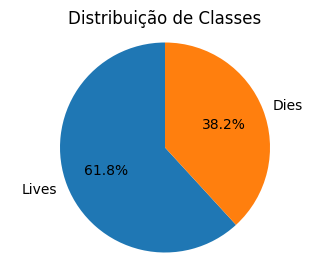

In [16]:
# Contagem de Classes
contagem_classes = new_df['Class'].value_counts()

# Visualização da Distribuição de Classes em um gráfico de pizza
plt.figure(figsize=(4, 3))
plt.pie(contagem_classes, labels=contagem_classes.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Para uma melhor observação e reflexão das variáveis categóricos decidimos distribuir por "violin plot".

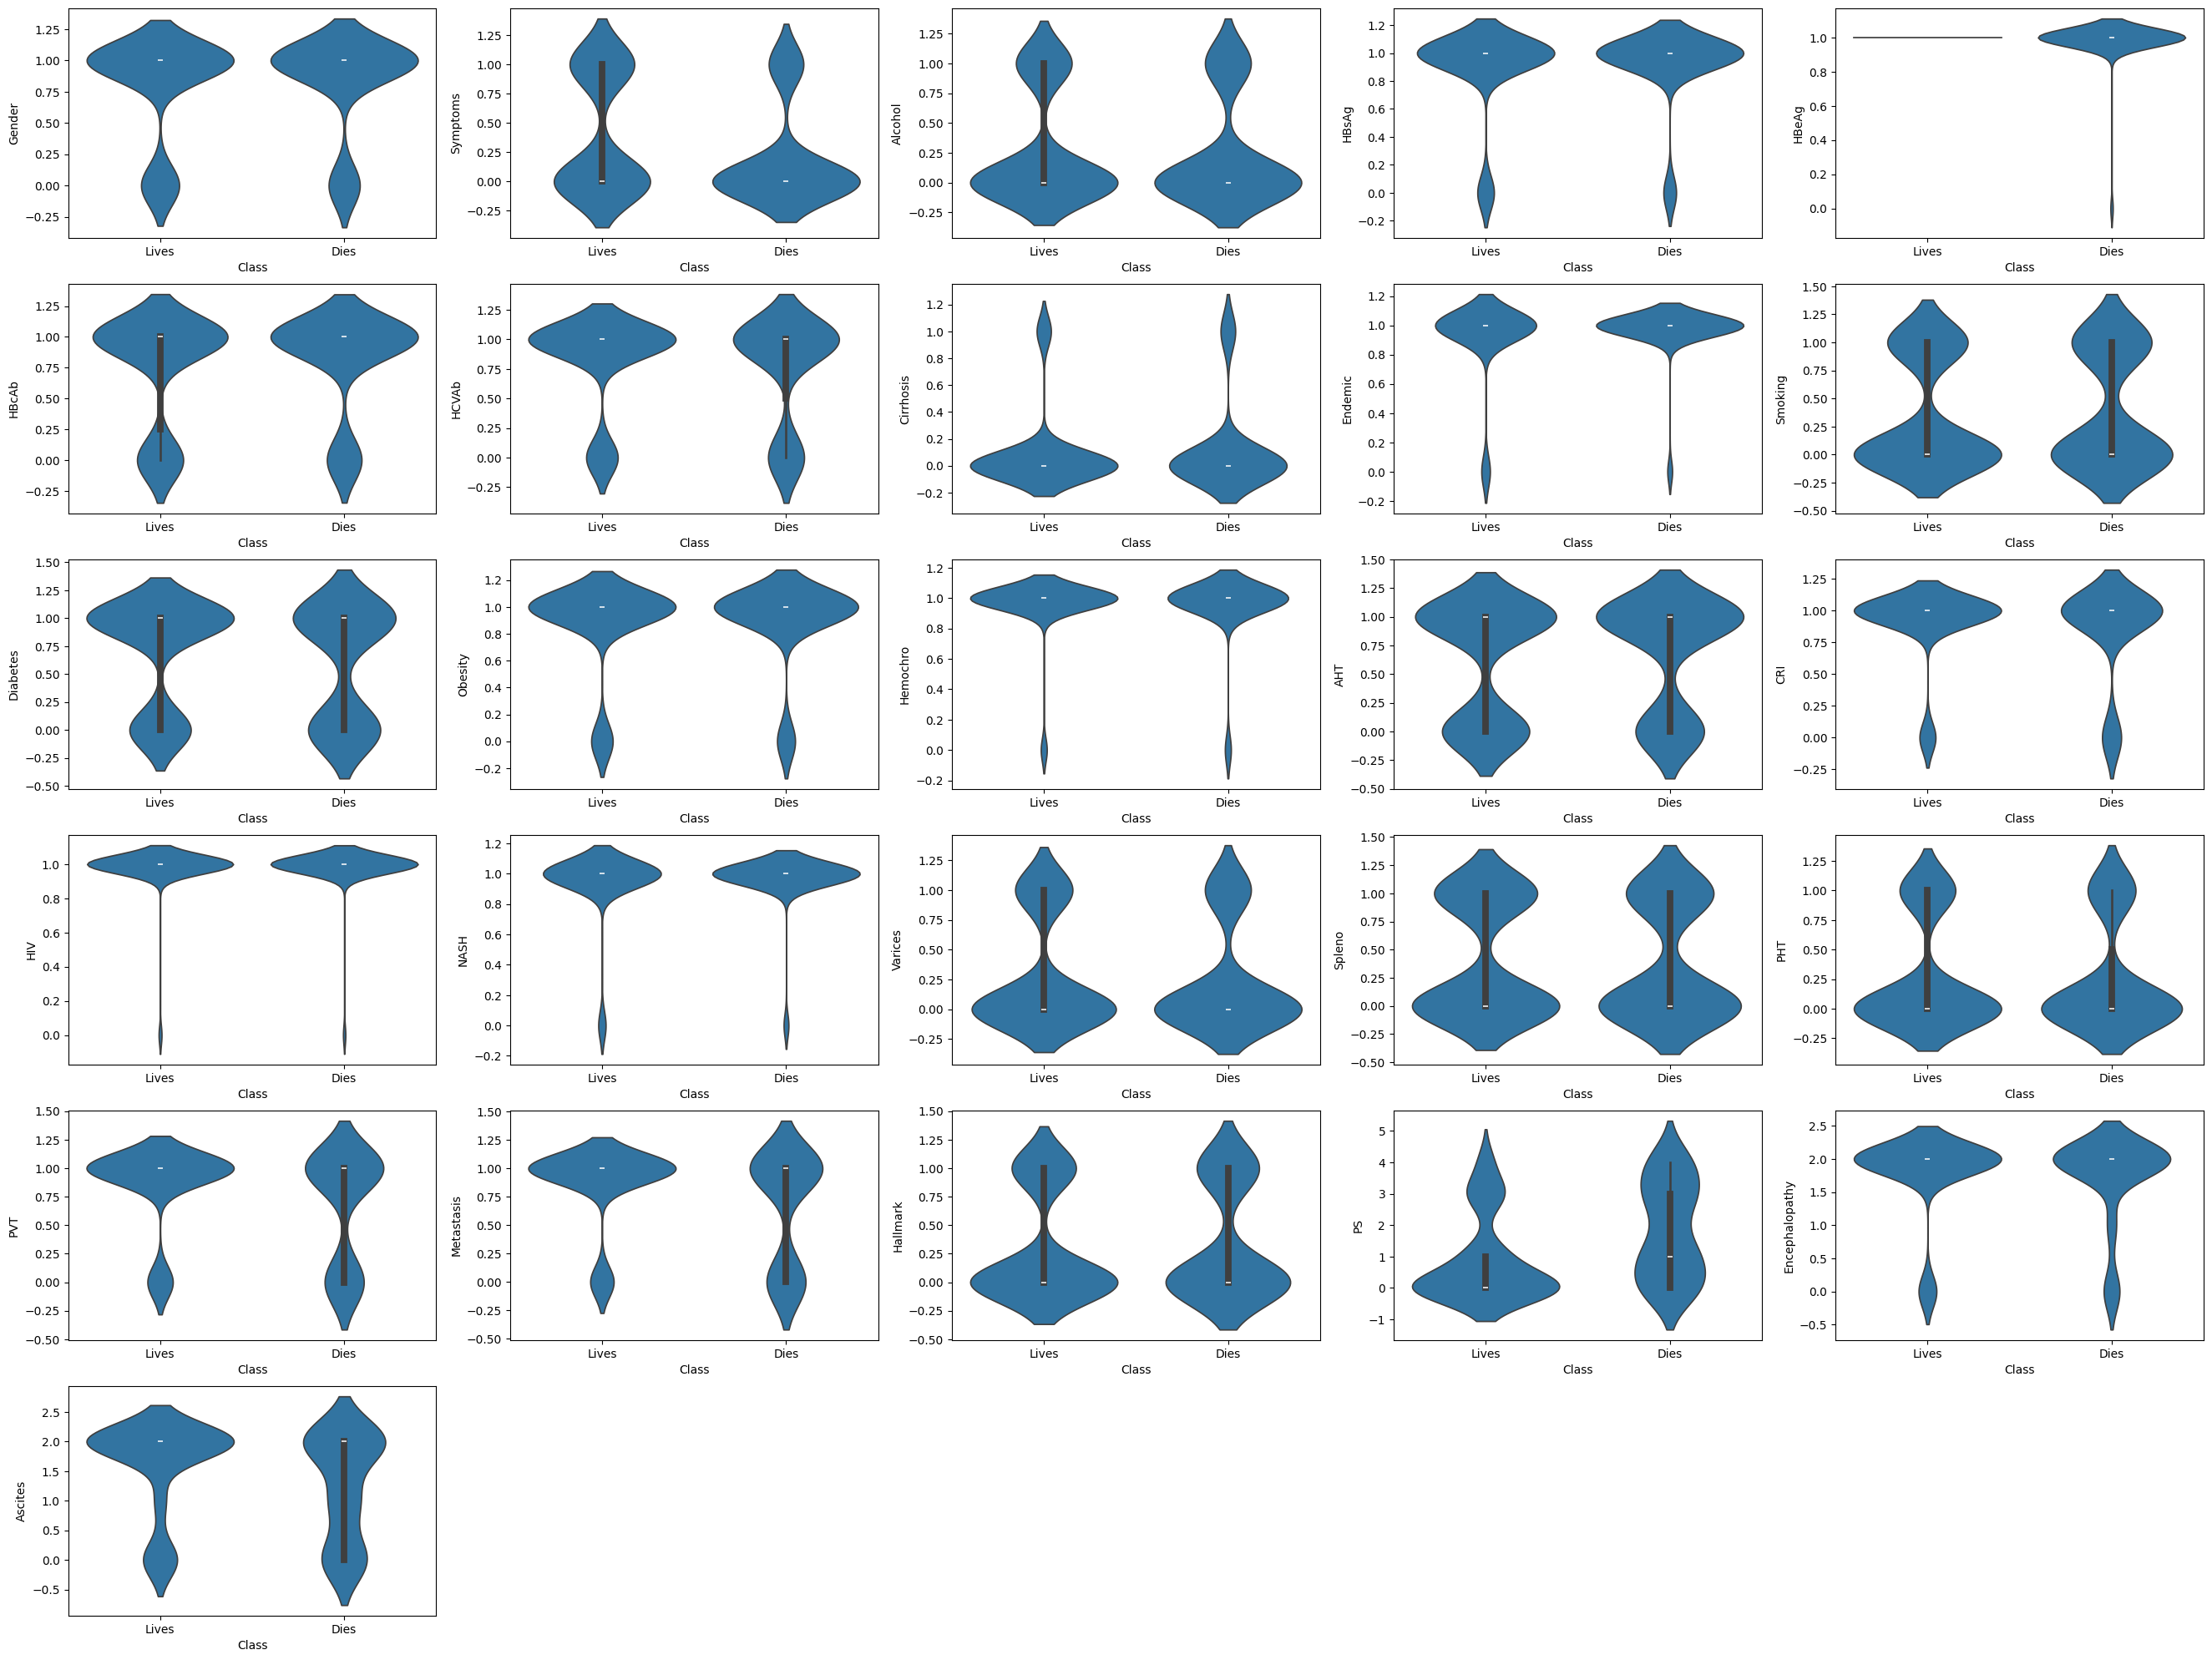

In [17]:
plt.figure(figsize=(33, 25))

colunas_categoricas = ['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'PS', 'Encephalopathy', 'Ascites']

for column_index, column in enumerate(file[colunas_categoricas]):
    plt.subplot(6,5, column_index+1)
    sns.violinplot(x = label_11, y=column, data=file)

Para uma melhor observação e reflexão das variáveis numéricos decidimos distribuir num "heatmap", onde as regiões mais avermelhadas são zonas de maior relevância e as zonas a azul são regiões de menor importância.

<function matplotlib.pyplot.show(close=None, block=None)>

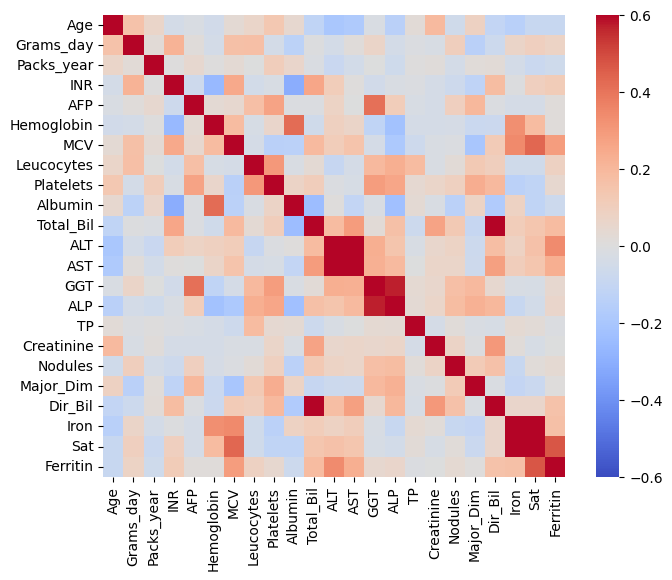

In [18]:
colunas_numericas = ['Age', 'Grams_day', 'Packs_year', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', 'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin']

fig = plt.figure(figsize = (8,6))

sns.heatmap(file[colunas_numericas].corr(), vmax = .6,vmin =-.6, square = True, cmap='coolwarm')
plt.show

## Classificação Inicial
[[ voltar ao ínicio ]](#Indíce)

Para uma primeira análise utilizamos todos os dados apenas alterados com o tratamente de dados anteriormente feito.

#### Preparação dos dados
[[ voltar ao ínicio ]](#Indíce)

In [19]:
dados = file[['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS', 'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', 'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin']]
destino = new_df['Class']

In [20]:
print(f"Tamanho de 'dados': {len(dados)}")
print(f"Tamanho de 'destino': {len(destino)}")

Tamanho de 'dados': 165
Tamanho de 'destino': 165


Utilizamos o SMOTE para equilibrar a distribuição das classes no conjunto de dados, assegurando que as classes minoritárias sejam suficientemente representadas e, assim, melhorar a precisão e a robustez dos modelos preditivos.

In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Verifique se 'dados' e 'destino' têm o mesmo número de amostras
assert len(dados) == len(destino), "dados e destino devem ter o mesmo número de amostras"

# Separar os dados em conjuntos (sets) de treino e de teste
dados_train, dados_test, destino_train, destino_test = train_test_split(dados, destino, test_size=0.25, random_state=42)

# Aplicar SMOTE para balanceamento de classes nos dados de treino
smote = SMOTE(random_state=42)
dados_train_balanced, destino_train_balanced = smote.fit_resample(dados_train, destino_train)

print("Distribuição das classes antes do SMOTE:", Counter(destino_train))
print("Distribuição das classes após o SMOTE:", Counter(destino_train_balanced))

Distribuição das classes antes do SMOTE: Counter({'Lives': 77, 'Dies': 46})
Distribuição das classes após o SMOTE: Counter({'Dies': 77, 'Lives': 77})


#### Verificação de dados
[[ voltar ao ínicio ]](#Indíce)

In [22]:
dados

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
0,1,1,0,1,1,1,1,0,1,0,...,183.000000,150.000000,7.100000,0.700000,1.0,3.5,0.50,85.598837,37.028941,438.997647
1,0,0,1,1,1,1,0,0,1,0,...,268.026543,212.211605,8.961039,1.127089,1.0,1.8,1.93,85.598837,37.028941,438.997647
2,1,1,0,0,1,0,1,0,1,0,...,202.000000,109.000000,7.000000,2.100000,5.0,13.0,0.10,28.000000,6.000000,16.000000
3,1,0,0,1,1,1,1,0,1,0,...,94.000000,174.000000,8.100000,1.110000,2.0,15.7,0.20,85.598837,37.028941,438.997647
4,1,0,0,0,1,0,1,0,1,0,...,173.000000,109.000000,6.900000,1.800000,1.0,9.0,1.93,59.000000,15.000000,22.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,1,0,1,1,1,0,0,1,0,...,449.000000,109.000000,7.600000,0.700000,5.0,3.0,1.93,85.598837,37.028941,438.997647
161,0,0,1,1,1,1,1,0,1,1,...,147.000000,280.000000,6.700000,0.700000,1.0,2.2,2.30,85.598837,37.028941,438.997647
162,1,1,0,1,1,1,1,0,1,0,...,164.000000,181.000000,7.500000,1.460000,5.0,18.6,1.93,85.598837,37.028941,438.997647
163,1,1,0,0,1,0,0,0,0,0,...,320.000000,170.000000,8.400000,0.740000,5.0,18.0,1.93,85.598837,37.028941,438.997647


In [23]:
destino

0      Lives
1      Lives
2      Lives
3       Dies
4      Lives
       ...  
160    Lives
161     Dies
162    Lives
163     Dies
164     Dies
Name: Class, Length: 165, dtype: object

### Aplicação de algorítmos
[[ voltar ao ínicio ]](#Indíce)

##### Decision Tree Classifier
[[ voltar ao ínicio ]](#Indíce)

Comecemos por construir uma primeira decision tree, no entanto é expectável que os resultados não sejam ótimos.

Treinar e avaliar o classificador

In [24]:
# Criar o classificador
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Treinar o classificador no set de treino
decision_tree_classifier.fit(dados_train, destino_train)

# Avaliar o classificador no set de teste
accuracy = decision_tree_classifier.score(dados_test, destino_test)

accuracy

0.6190476190476191

Efetuamos uma cross-validation para esta primeira decision tree.

Text(0.5, 1.0, 'Average score: 0.6121212121212121')

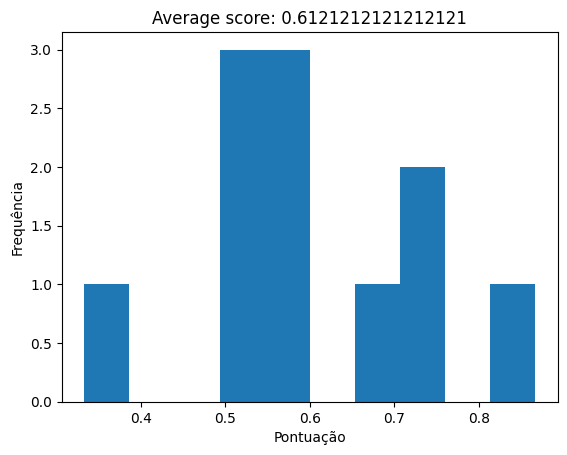

In [25]:
from sklearn.model_selection import cross_val_score

# Definir a estratégia de validação cruzada
cv_scores = cross_val_score(decision_tree_classifier, dados, destino , cv=11)

# Plotar a distribuição das pontuações da validação cruzada
plt.hist(cv_scores)
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Optámos por utilizar outro tipo de método de partição, o leave-one-out.

In [26]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Separar os dados de entrada (X) e os rótulos (y)
X = dados  # Assumindo que a coluna de destino é chamada "label"
y = destino

# Inicializar o modelo
model = DecisionTreeClassifier()

# Inicializar Leave-One-Out cross-validator
loo = LeaveOneOut()

# Listas para armazenar os resultados
y_true, y_pred = [], []

# Realizar Leave-One-Out Cross-Validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Treinar o modelo
    model.fit(X_train, y_train)
    
    # Fazer predições
    y_pred.append(model.predict(X_test)[0])
    y_true.append(y_test.iloc[0])

# Calcular a acurácia
accuracy = accuracy_score(y_true, y_pred)
print(f'Precisão: {accuracy:.4f}')

Precisão: 0.6788


Como era expectável, dadas as reduzidas dimensões do dataset, o leave-one-out cross validation obteve uma precisão ligeiramente mais elevada.

Avaliar o modelo de Decision Tree no set de Teste

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

# Treinar o modelo de Decision Tree nos dados de treino
decision_tree_classifier.fit(dados_train, destino_train)

# Avaliar o modelo de Decision Tree no set de teste
dt_accuracy = decision_tree_classifier.score(dados_test, destino_test)
print(f'Decision Tree Accuracy: {dt_accuracy:.4f}')

# Prever no set de teste
predictions_dt = decision_tree_classifier.predict(dados_test)

# Mostrar a matriz de confusão e o relatório de classificação
print(confusion_matrix(destino_test, predictions_dt))
print(classification_report(destino_test, predictions_dt))

Decision Tree Accuracy: 0.6190
[[10  7]
 [ 9 16]]
              precision    recall  f1-score   support

        Dies       0.53      0.59      0.56        17
       Lives       0.70      0.64      0.67        25

    accuracy                           0.62        42
   macro avg       0.61      0.61      0.61        42
weighted avg       0.63      0.62      0.62        42



Apesar da cross-validation ser consistente com a accuracy do set de teste, sugerindo que o modelo está a generalizar de forma correta, mostram também que ainda há espaço para melhorias, visto indicarem uma accuracy (proporção de previsões corretas entre o total de previsões feitas) moderada.
Vamos prosseguir com o tratamento dos dados de modo a tentar obter melhores resultados.

Aplicámos uma grid-search de modo a compreender qual a profundidade e número de features ideais.

In [28]:
# Definir os parâmetros
parameter_grid = {'max_depth': range(1, 10),
                  'max_features': range(1, 11)}

# Definir a estratégia de cross-validation
cross_validation = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Realizar a greed-search
grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)
grid_search.fit(dados, destino)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7397058823529411
Best parameters: {'max_depth': 4, 'max_features': 2}


Vejamos agora a importância de cada feature

In [29]:
# Definir a função que mede a importância de cada 'feature'
def importance(classifier, dados_train, destino_train):
    classifier.fit(dados_train, destino_train)
    importance=pd.DataFrame({'feature':dados.columns,
                             'importance':np.round(classifier.feature_importances_, 3)})
    importance.sort_values('importance',ascending=False, inplace =True)
    return importance[importance.importance>0]

Utilizando o critério 'Gini'

In [30]:
# Compute feature importance using 'gini' criterion
treegini = DecisionTreeClassifier(criterion="gini", max_features=2, max_depth=4, random_state=42)
importance_gini = importance(treegini, dados_train, destino_train)

importance_gini

,feature,importance
40,ALP,0.349
34,Platelets,0.251
41,TP,0.098
45,Dir_Bil,0.098
37,ALT,0.074
36,Total_Bil,0.056
46,Iron,0.053
8,Endemic,0.019
11,Obesity,0.002


Utilizando o critério 'Entropy'

In [31]:
# Compute feature importance using 'entropy' criterion
treeentropy = DecisionTreeClassifier(criterion="entropy", max_features=2, max_depth=4, random_state=42)
importance_entropy = importance(treeentropy, dados_train, destino_train)

importance_entropy

,feature,importance
40,ALP,0.318
34,Platelets,0.219
45,Dir_Bil,0.101
37,ALT,0.093
41,TP,0.089
36,Total_Bil,0.085
46,Iron,0.062
8,Endemic,0.022
18,Spleno,0.010
11,Obesity,0.002


De seguida, decidimos testar outros algoritmos como o KNN e o Random forest. 

#### KNN
[[ voltar ao ínicio ]](#Indíce)

Treinar e Avaliar o Modelo KNN com cross-validation

Text(0.5, 1.0, 'Average score: 0.5886029411764706')

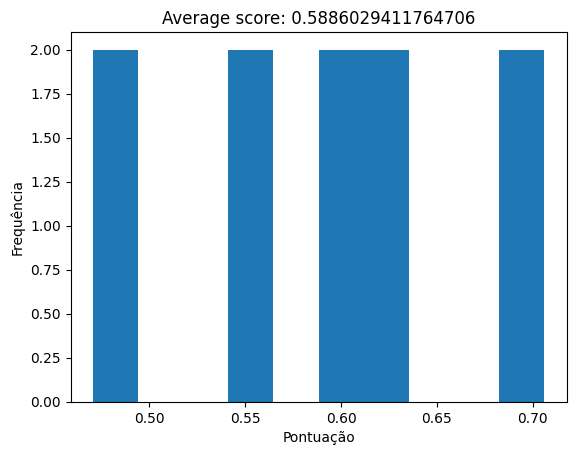

In [32]:
# Criar e treinar o modelo KNN
knn_model = KNeighborsClassifier()

# Definir a estratégia de cross-validation
crossv = StratifiedKFold(n_splits=10)


# Executar a cross-validation
cv_scores = cross_val_score(knn_model, dados, np.array(destino).ravel(), cv=crossv)

# Plotar a distribuição das pontuações da validação cruzada
plt.hist(cv_scores)
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Com o método leave-on-out 

In [33]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Separar os dados de entrada (X) e os rótulos (y)
X = dados  # Assumindo que a coluna de destino é chamada "label"
y = destino

# Inicializar o modelo
model = KNeighborsClassifier()

# Inicializar Leave-One-Out cross-validator
loo = LeaveOneOut()

# Listas para armazenar os resultados
y_true, y_pred = [], []

# Realizar Leave-One-Out Cross-Validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Treinar o modelo
    model.fit(X_train, y_train)
    
    # Fazer predições
    y_pred.append(model.predict(X_test)[0])
    y_true.append(y_test.iloc[0])

# Calcular a acurácia
accuracy = accuracy_score(y_true, y_pred)
print(f'Precisão: {accuracy:.4f}')

Precisão: 0.5758


Avaliar o Modelo KNN no set de Teste

In [34]:
# Treinar o modelo KNN nos dados de treino
knn_model.fit(dados_train, destino_train)

# Avaliar o modelo KNN no set de teste
knn_accuracy = knn_model.score(dados_test, destino_test)
print(f'KNN Accuracy: {knn_accuracy:.4f}')

# Prever no set de teste
predictions_knn = knn_model.predict(dados_test)

# Mostrar a matriz de confusão e o relatório de classificação
print(confusion_matrix(destino_test, predictions_knn))
print(classification_report(destino_test, predictions_knn))

KNN Accuracy: 0.5714
[[ 6 11]
 [ 7 18]]
              precision    recall  f1-score   support

        Dies       0.46      0.35      0.40        17
       Lives       0.62      0.72      0.67        25

    accuracy                           0.57        42
   macro avg       0.54      0.54      0.53        42
weighted avg       0.56      0.57      0.56        42



Numa analise rápida conseguimos perceber que o valor de cross-validation com o KNN e até mesmo com o método leave-on-out é menor que o valor de cross-validation ou leave-on-out com a Decision Tree .

#### Random forest
[[ voltar ao ínicio ]](#Indíce)

Treinar e avaliar o modelo Random Forest com cross-validation

Text(0.5, 1.0, 'Average score: 0.7338235294117647')

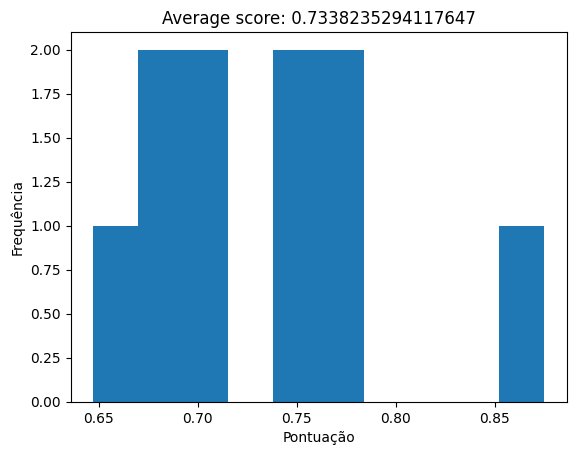

In [35]:
# Criar e treinar o modelo Random Forest
random_forest_classifier = RandomForestClassifier(random_state=42)

# Definir a estratégia de cross-validation
crossv = StratifiedKFold(n_splits=10)

# Executar a cross-validation
cv_scores = cross_val_score(random_forest_classifier, dados, np.array(destino).ravel(), cv=crossv)

# Plotar a distribuição das pontuações da cross-validation
plt.hist(cv_scores)
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Com o método leave-on-out 

In [36]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Separar os dados de entrada (X) e os rótulos (y)
X = dados  # Assumindo que a coluna de destino é chamada "label"
y = destino

# Inicializar o modelo
model = RandomForestClassifier(random_state=42)

# Inicializar Leave-One-Out cross-validator
loo = LeaveOneOut()

# Listas para armazenar os resultados
y_true, y_pred = [], []

# Realizar Leave-One-Out Cross-Validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Treinar o modelo
    model.fit(X_train, y_train)
    
    # Fazer predições
    y_pred.append(model.predict(X_test)[0])
    y_true.append(y_test.iloc[0])

# Calcular a acurácia
accuracy = accuracy_score(y_true, y_pred)
print(f'Precisão: {accuracy:.4f}')

Precisão: 0.6909


Avaliar o modelo Random Forest no set de Teste

In [37]:
# Treinar o modelo Random Forest nos dados de treino
random_forest_classifier.fit(dados_train, destino_train)

# Avaliar o modelo Random Forest no conjunto de teste
rf_accuracy = random_forest_classifier.score(dados_test, destino_test)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')

# Prever no set de teste
predictions_rf = random_forest_classifier.predict(dados_test)

# Mostrar a matriz de confusão e o relatório de classificação
print(confusion_matrix(destino_test, predictions_rf))
print(classification_report(destino_test, predictions_rf))

Random Forest Accuracy: 0.7381
[[11  6]
 [ 5 20]]
              precision    recall  f1-score   support

        Dies       0.69      0.65      0.67        17
       Lives       0.77      0.80      0.78        25

    accuracy                           0.74        42
   macro avg       0.73      0.72      0.73        42
weighted avg       0.74      0.74      0.74        42



Ao compararmos os três algoritmos, concluímos que o modelo Random Forest com o método leave-on-out é o que mais se destaca entre os três, para este conjunto de dados, com o melhor desempenho geral nas métricas avaliadas:
- Maior precisão (0.7381);

- Apresenta menos falsos positivos e falsos negativos em comparação aos outros modelos; 

- Melhores valores tanto para precisão, recall, e F1-score para ambas as classes.

Vejamos agora a importância de cada feature usando este modelo.

In [38]:
# Calcular a importância das features
feature_importances = random_forest_classifier.feature_importances_

# Criar um DataFrame com a importância das features
importance_df = pd.DataFrame({'feature': dados.columns, 'importance': feature_importances})

# Ordenar o DataFrame de acordo com a importância das features
importance_df = importance_df.sort_values(by='importance', ascending=False)

importance_df

,feature,importance
40,ALP,0.099119
31,Hemoglobin,0.091123
30,AFP,0.052695
34,Platelets,0.047034
46,Iron,0.044719
26,PS,0.040245
32,MCV,0.037366
47,Sat,0.036992
29,INR,0.036281
39,GGT,0.035301


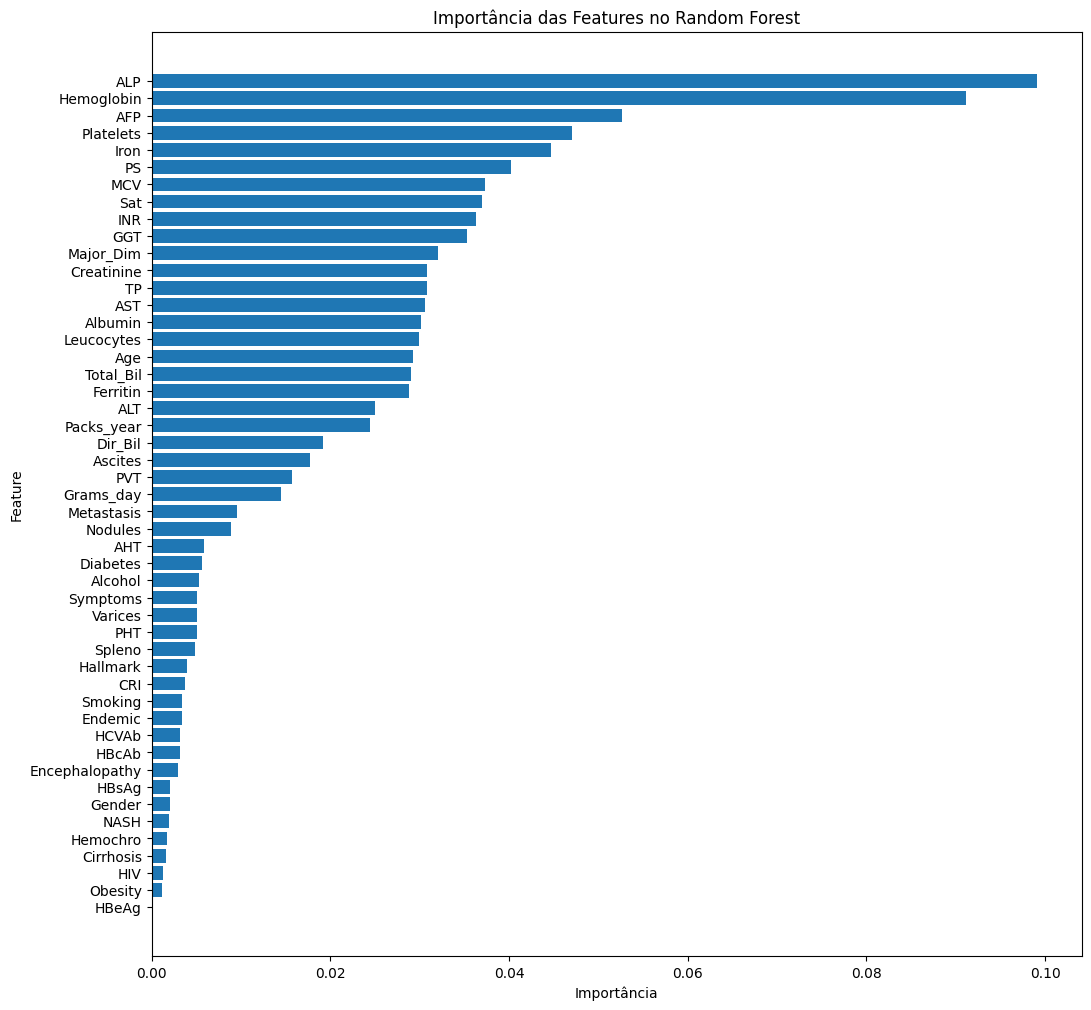

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features no Random Forest')
plt.gca().invert_yaxis()  # Colocar as features mais importantes no topo
plt.show()

## Simplificação dos dados
[[ voltar ao ínicio ]](#Indíce)

Optamos por realizar novamente o treino dos modelos excluindo as características menos significativas, a fim de efetuar uma comparação de desempenho. Tal medida decorre da premissa de que a simplificação pode resultar num modelo mais ágil e de interpretação mais acessível, sem comprometer a precisão.

#### 1ª Tentativa
[[ voltar ao ínicio ]](#Indíce)

Começamos por retirar todas as colunas com menor importância, a partir de 'AHT'.

In [40]:
dados.drop(['HBeAg', 'Obesity', 'HIV', 'Cirrhosis', 'Hemochro', 'NASH', 'Hallmark', 'CRI', 'Smoking', 'Endemic', 'HCVAb', 'HBcAb', 'Encephalopathy', 'HBsAg', 'Gender', 'Spleno', 'AHT', 'Diabetes', 'Alcohol', 'Symptoms', 'Varices', 'PHT'], axis=1, inplace=True)
dados

,PVT,Metastasis,Age,Grams_day,Packs_year,PS,Ascites,INR,AFP,Hemoglobin,...,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
0,1,1,67,137.000000,15.000000,0,2,1.530000,95.000000,13.700000,...,183.000000,150.000000,7.100000,0.700000,1.0,3.5,0.50,85.598837,37.028941,438.997647
1,1,1,62,0.000000,20.464286,0,2,1.421851,19299.951146,12.879012,...,268.026543,212.211605,8.961039,1.127089,1.0,1.8,1.93,85.598837,37.028941,438.997647
2,1,0,78,50.000000,50.000000,1,0,0.960000,5.800000,8.900000,...,202.000000,109.000000,7.000000,2.100000,5.0,13.0,0.10,28.000000,6.000000,16.000000
3,1,0,77,40.000000,30.000000,0,2,0.950000,2440.000000,13.400000,...,94.000000,174.000000,8.100000,1.110000,2.0,15.7,0.20,85.598837,37.028941,438.997647
4,1,1,76,100.000000,30.000000,0,2,0.940000,49.000000,14.300000,...,173.000000,109.000000,6.900000,1.800000,1.0,9.0,1.93,59.000000,15.000000,22.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1,1,40,71.008547,20.464286,0,2,0.840000,19299.951146,15.400000,...,449.000000,109.000000,7.600000,0.700000,5.0,3.0,1.93,85.598837,37.028941,438.997647
161,1,1,68,0.000000,0.000000,1,2,1.330000,4887.000000,12.100000,...,147.000000,280.000000,6.700000,0.700000,1.0,2.2,2.30,85.598837,37.028941,438.997647
162,1,1,65,71.008547,48.000000,0,2,1.130000,75.000000,13.300000,...,164.000000,181.000000,7.500000,1.460000,5.0,18.6,1.93,85.598837,37.028941,438.997647
163,0,0,44,71.008547,20.464286,1,2,2.140000,94964.000000,15.600000,...,320.000000,170.000000,8.400000,0.740000,5.0,18.0,1.93,85.598837,37.028941,438.997647


#### Decision Tree Classifier

Text(0.5, 1.0, 'Average score: 0.6363636363636364')

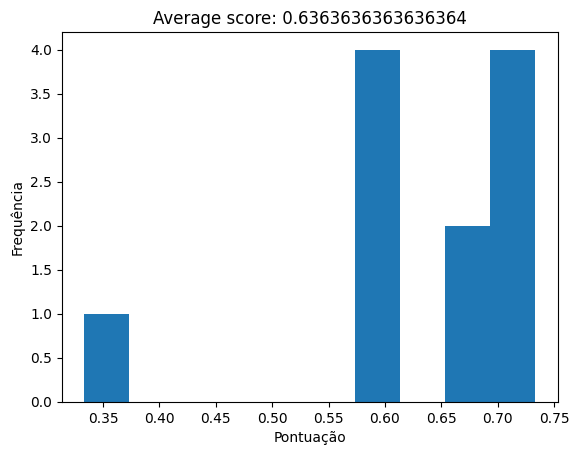

In [41]:
from sklearn.model_selection import cross_val_score

# Definir a estratégia de validação cruzada
cv_scores = cross_val_score(decision_tree_classifier, dados, destino , cv=11)

# Plotar a distribuição das pontuações da validação cruzada
plt.hist(cv_scores)
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

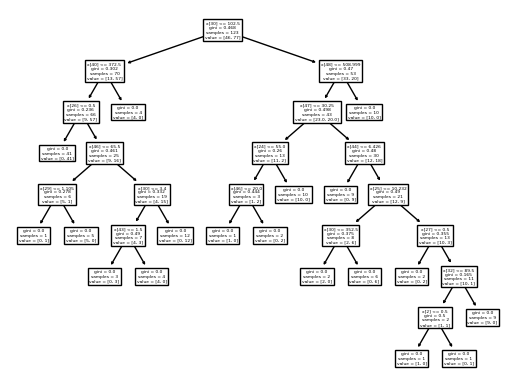

In [42]:
from sklearn.tree import plot_tree
plot_tree(decision_tree_classifier)
plt.show()

#### KNN

Text(0.5, 1.0, 'Average score: 0.5886029411764706')

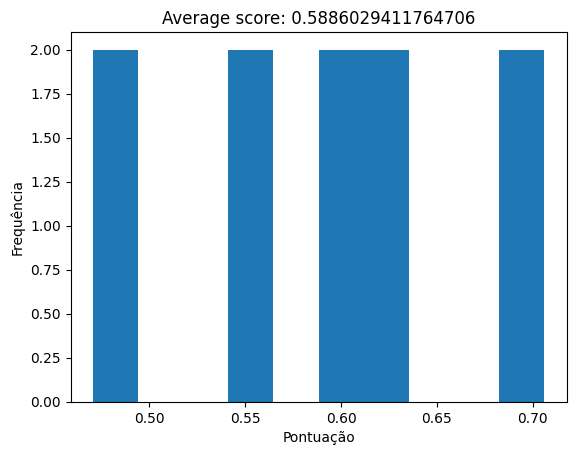

In [43]:
# Criar e treinar o modelo KNN
knn_model = KNeighborsClassifier()

# Definir a estratégia de cross-validation
crossv = StratifiedKFold(n_splits=10)


# Executar a cross-validation
cv_scores = cross_val_score(knn_model, dados, np.array(destino).ravel(), cv=crossv)

# Plotar a distribuição das pontuações da validação cruzada
plt.hist(cv_scores)
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

### Random forest

Text(0.5, 1.0, 'Average score: 0.7279411764705882')

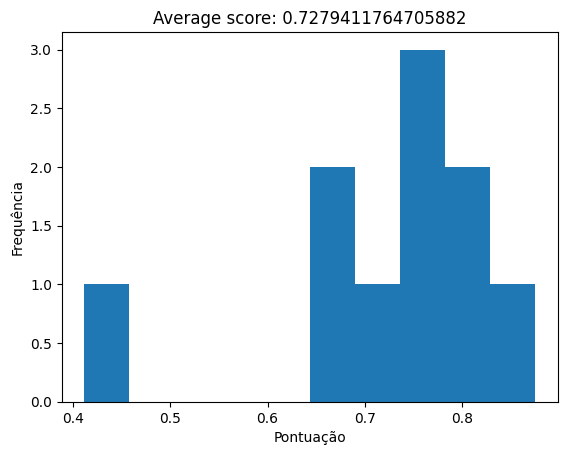

In [44]:
# Criar e treinar o modelo Random Forest
random_forest_classifier = RandomForestClassifier(random_state=42)

# Definir a estratégia de cross-validation
crossv = StratifiedKFold(n_splits=10)

# Executar a cross-validation
cv_scores = cross_val_score(random_forest_classifier, dados, np.array(destino).ravel(), cv=crossv)

# Plotar a distribuição das pontuações da cross-validation
plt.hist(cv_scores)
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

#### 2ª Tentativa
[[ voltar ao ínicio ]](#Indíce)

Retiramos as colunas: 'Nodules', 'Metastasis'

In [45]:
dados.drop(['Nodules', 'Metastasis'], axis=1, inplace=True)
# 'Grams_day', 'PVT', 'Ascites', 'Dir_Bil', 'Packs_year', 'ALT'
dados

,PVT,Age,Grams_day,Packs_year,PS,Ascites,INR,AFP,Hemoglobin,MCV,...,AST,GGT,ALP,TP,Creatinine,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
0,1,67,137.000000,15.000000,0,2,1.530000,95.000000,13.700000,106.600000,...,41.000000,183.000000,150.000000,7.100000,0.700000,3.5,0.50,85.598837,37.028941,438.997647
1,1,62,0.000000,20.464286,0,2,1.421851,19299.951146,12.879012,95.119753,...,96.382716,268.026543,212.211605,8.961039,1.127089,1.8,1.93,85.598837,37.028941,438.997647
2,1,78,50.000000,50.000000,1,0,0.960000,5.800000,8.900000,79.800000,...,68.000000,202.000000,109.000000,7.000000,2.100000,13.0,0.10,28.000000,6.000000,16.000000
3,1,77,40.000000,30.000000,0,2,0.950000,2440.000000,13.400000,97.100000,...,64.000000,94.000000,174.000000,8.100000,1.110000,15.7,0.20,85.598837,37.028941,438.997647
4,1,76,100.000000,30.000000,0,2,0.940000,49.000000,14.300000,95.100000,...,306.000000,173.000000,109.000000,6.900000,1.800000,9.0,1.93,59.000000,15.000000,22.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1,40,71.008547,20.464286,0,2,0.840000,19299.951146,15.400000,109.200000,...,40.000000,449.000000,109.000000,7.600000,0.700000,3.0,1.93,85.598837,37.028941,438.997647
161,1,68,0.000000,0.000000,1,2,1.330000,4887.000000,12.100000,88.900000,...,91.000000,147.000000,280.000000,6.700000,0.700000,2.2,2.30,85.598837,37.028941,438.997647
162,1,65,71.008547,48.000000,0,2,1.130000,75.000000,13.300000,90.000000,...,52.000000,164.000000,181.000000,7.500000,1.460000,18.6,1.93,85.598837,37.028941,438.997647
163,0,44,71.008547,20.464286,1,2,2.140000,94964.000000,15.600000,117.300000,...,60.000000,320.000000,170.000000,8.400000,0.740000,18.0,1.93,85.598837,37.028941,438.997647


#### Decision Tree Classifier

Text(0.5, 1.0, 'Average score: 0.5999999999999999')

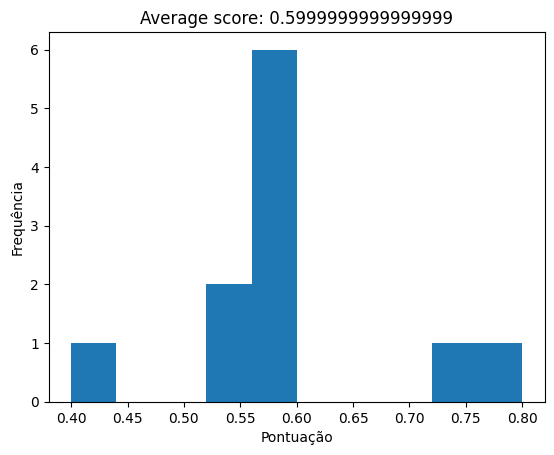

In [46]:
from sklearn.model_selection import cross_val_score

# Definir a estratégia de validação cruzada
cv_scores = cross_val_score(decision_tree_classifier, dados, destino , cv=11)

# Plotar a distribuição das pontuações da validação cruzada
plt.hist(cv_scores)
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

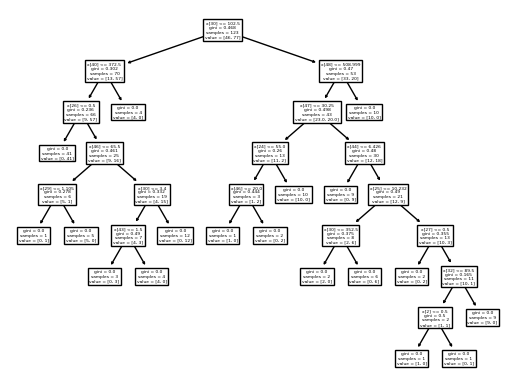

In [47]:
from sklearn.tree import plot_tree
plot_tree(decision_tree_classifier)
plt.show()

#### KNN
[[ voltar ao ínicio ]](#Indíce)

Text(0.5, 1.0, 'Average score: 0.5886029411764706')

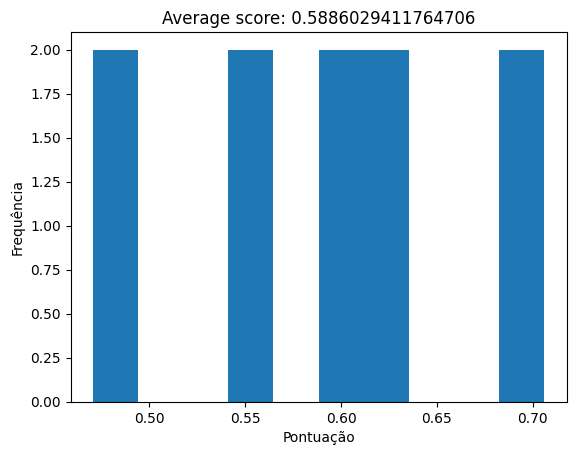

In [48]:
# Criar e treinar o modelo KNN
knn_model = KNeighborsClassifier()

# Definir a estratégia de cross-validation
crossv = StratifiedKFold(n_splits=10)


# Executar a cross-validation
cv_scores = cross_val_score(knn_model, dados, np.array(destino).ravel(), cv=crossv)

# Plotar a distribuição das pontuações da validação cruzada
plt.hist(cv_scores)
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

#### Random forest

Text(0.5, 1.0, 'Average score: 0.7216911764705882')

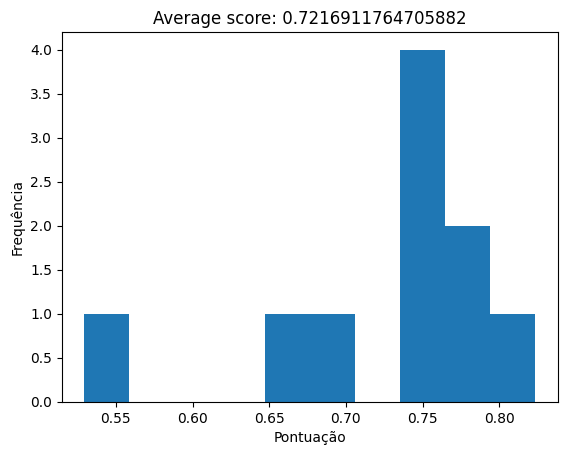

In [49]:
# Criar e treinar o modelo Random Forest
random_forest_classifier = RandomForestClassifier(random_state=42)

# Definir a estratégia de cross-validation
crossv = StratifiedKFold(n_splits=10)

# Executar a cross-validation
cv_scores = cross_val_score(random_forest_classifier, dados, np.array(destino).ravel(), cv=crossv)

# Plotar a distribuição das pontuações da cross-validation
plt.hist(cv_scores)
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

#### 3ª Tentativa
[[ voltar ao ínicio ]](#Indíce)

Retiramos as colunas: 'Grams_day', 'PVT', 'Ascites', 'Dir_Bil'

In [50]:
dados.drop(['Grams_day', 'PVT', 'Ascites', 'Dir_Bil'], axis=1, inplace=True)
# 'Packs_year', 'ALT'
dados

,Age,Packs_year,PS,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,...,ALT,AST,GGT,ALP,TP,Creatinine,Major_Dim,Iron,Sat,Ferritin
0,67,15.000000,0,1.530000,95.000000,13.700000,106.600000,4.900000,99.000000,3.400000,...,34.000000,41.000000,183.000000,150.000000,7.100000,0.700000,3.5,85.598837,37.028941,438.997647
1,62,20.464286,0,1.421851,19299.951146,12.879012,95.119753,1473.961549,113206.442654,3.445535,...,67.093168,96.382716,268.026543,212.211605,8.961039,1.127089,1.8,85.598837,37.028941,438.997647
2,78,50.000000,1,0.960000,5.800000,8.900000,79.800000,8.400000,472.000000,3.300000,...,58.000000,68.000000,202.000000,109.000000,7.000000,2.100000,13.0,28.000000,6.000000,16.000000
3,77,30.000000,0,0.950000,2440.000000,13.400000,97.100000,9.000000,279.000000,3.700000,...,16.000000,64.000000,94.000000,174.000000,8.100000,1.110000,15.7,85.598837,37.028941,438.997647
4,76,30.000000,0,0.940000,49.000000,14.300000,95.100000,6.400000,199.000000,4.100000,...,147.000000,306.000000,173.000000,109.000000,6.900000,1.800000,9.0,59.000000,15.000000,22.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,40,20.464286,0,0.840000,19299.951146,15.400000,109.200000,9.300000,184000.000000,4.600000,...,35.000000,40.000000,449.000000,109.000000,7.600000,0.700000,3.0,85.598837,37.028941,438.997647
161,68,0.000000,1,1.330000,4887.000000,12.100000,88.900000,2.500000,141.000000,3.000000,...,50.000000,91.000000,147.000000,280.000000,6.700000,0.700000,2.2,85.598837,37.028941,438.997647
162,65,48.000000,0,1.130000,75.000000,13.300000,90.000000,8.000000,385000.000000,4.300000,...,53.000000,52.000000,164.000000,181.000000,7.500000,1.460000,18.6,85.598837,37.028941,438.997647
163,44,20.464286,1,2.140000,94964.000000,15.600000,117.300000,5200.000000,118000.000000,4.800000,...,50.000000,60.000000,320.000000,170.000000,8.400000,0.740000,18.0,85.598837,37.028941,438.997647


#### Decision Tree Classifier

Text(0.5, 1.0, 'Average score: 0.5818181818181817')

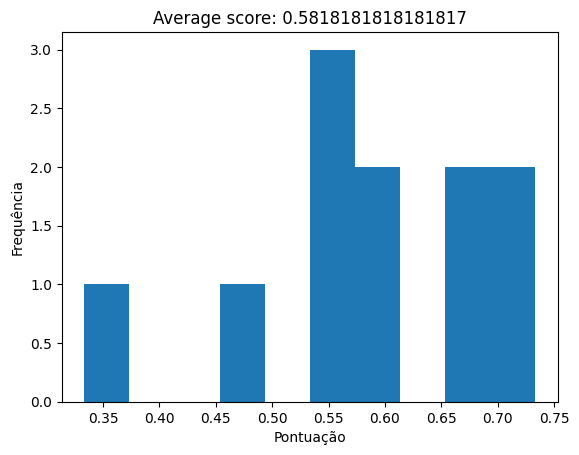

In [51]:
from sklearn.model_selection import cross_val_score

# Definir a estratégia de validação cruzada
cv_scores = cross_val_score(decision_tree_classifier, dados, destino , cv=11)

# Plotar a distribuição das pontuações da validação cruzada
plt.hist(cv_scores)
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

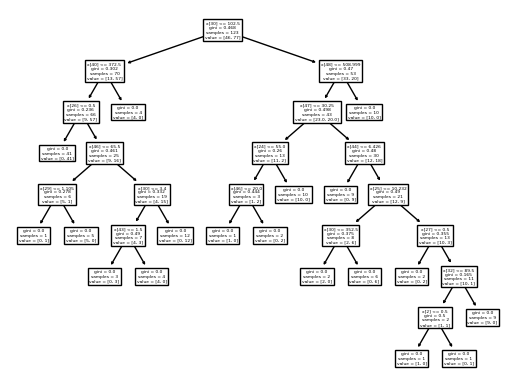

In [52]:
from sklearn.tree import plot_tree
plot_tree(decision_tree_classifier)
plt.show()

#### KNN

Text(0.5, 1.0, 'Average score: 0.5886029411764706')

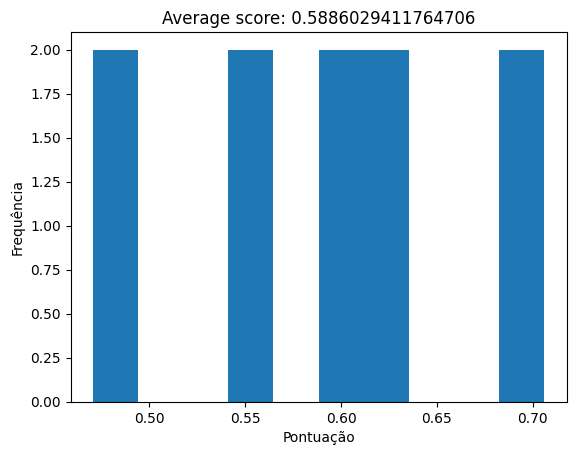

In [53]:
# Criar e treinar o modelo KNN
knn_model = KNeighborsClassifier()

# Definir a estratégia de cross-validation
crossv = StratifiedKFold(n_splits=10)


# Executar a cross-validation
cv_scores = cross_val_score(knn_model, dados, np.array(destino).ravel(), cv=crossv)

# Plotar a distribuição das pontuações da validação cruzada
plt.hist(cv_scores)
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

#### Random forest

Text(0.5, 1.0, 'Average score: 0.7397058823529411')

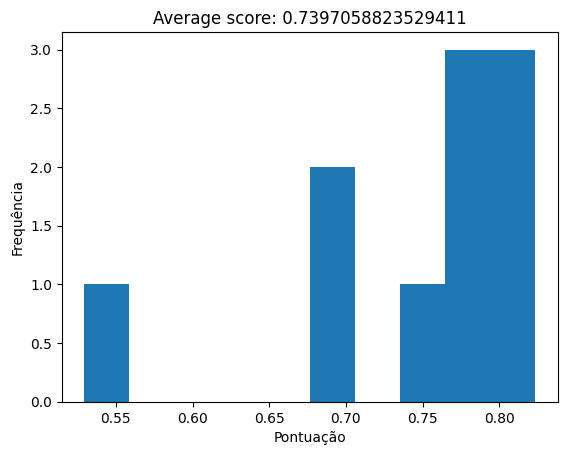

In [54]:
# Criar e treinar o modelo Random Forest
random_forest_classifier = RandomForestClassifier(random_state=42)

# Definir a estratégia de cross-validation
crossv = StratifiedKFold(n_splits=10)

# Executar a cross-validation
cv_scores = cross_val_score(random_forest_classifier, dados, np.array(destino).ravel(), cv=crossv)

# Plotar a distribuição das pontuações da cross-validation
plt.hist(cv_scores)
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

#### 4ª Tentativa
[[ voltar ao ínicio ]](#Indíce)

Retiramos as colunas: 'Packs_year', 'ALT'

In [55]:
dados.drop(['Packs_year', 'ALT'], axis=1, inplace=True)
dados

,Age,PS,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,AST,GGT,ALP,TP,Creatinine,Major_Dim,Iron,Sat,Ferritin
0,67,0,1.530000,95.000000,13.700000,106.600000,4.900000,99.000000,3.400000,2.100000,41.000000,183.000000,150.000000,7.100000,0.700000,3.5,85.598837,37.028941,438.997647
1,62,0,1.421851,19299.951146,12.879012,95.119753,1473.961549,113206.442654,3.445535,3.087938,96.382716,268.026543,212.211605,8.961039,1.127089,1.8,85.598837,37.028941,438.997647
2,78,1,0.960000,5.800000,8.900000,79.800000,8.400000,472.000000,3.300000,0.400000,68.000000,202.000000,109.000000,7.000000,2.100000,13.0,28.000000,6.000000,16.000000
3,77,0,0.950000,2440.000000,13.400000,97.100000,9.000000,279.000000,3.700000,0.400000,64.000000,94.000000,174.000000,8.100000,1.110000,15.7,85.598837,37.028941,438.997647
4,76,0,0.940000,49.000000,14.300000,95.100000,6.400000,199.000000,4.100000,0.700000,306.000000,173.000000,109.000000,6.900000,1.800000,9.0,59.000000,15.000000,22.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,40,0,0.840000,19299.951146,15.400000,109.200000,9.300000,184000.000000,4.600000,0.500000,40.000000,449.000000,109.000000,7.600000,0.700000,3.0,85.598837,37.028941,438.997647
161,68,1,1.330000,4887.000000,12.100000,88.900000,2.500000,141.000000,3.000000,3.600000,91.000000,147.000000,280.000000,6.700000,0.700000,2.2,85.598837,37.028941,438.997647
162,65,0,1.130000,75.000000,13.300000,90.000000,8.000000,385000.000000,4.300000,0.600000,52.000000,164.000000,181.000000,7.500000,1.460000,18.6,85.598837,37.028941,438.997647
163,44,1,2.140000,94964.000000,15.600000,117.300000,5200.000000,118000.000000,4.800000,1.100000,60.000000,320.000000,170.000000,8.400000,0.740000,18.0,85.598837,37.028941,438.997647


#### Decision Tree Classifier

Text(0.5, 1.0, 'Average score: 0.5818181818181818')

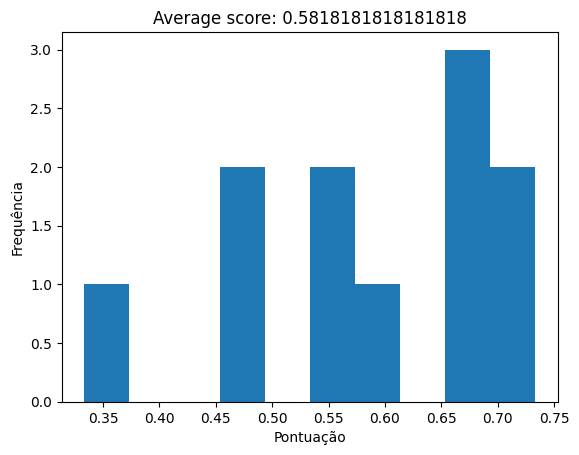

In [56]:
from sklearn.model_selection import cross_val_score

# Definir a estratégia de validação cruzada
cv_scores = cross_val_score(decision_tree_classifier, dados, destino , cv=11)

# Plotar a distribuição das pontuações da validação cruzada
plt.hist(cv_scores)
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

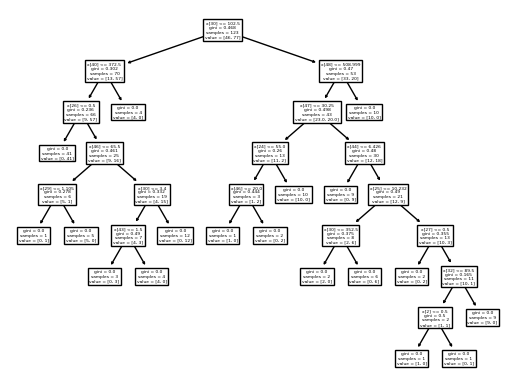

In [57]:
from sklearn.tree import plot_tree
plot_tree(decision_tree_classifier)
plt.show()

#### KNN

Text(0.5, 1.0, 'Average score: 0.5823529411764706')

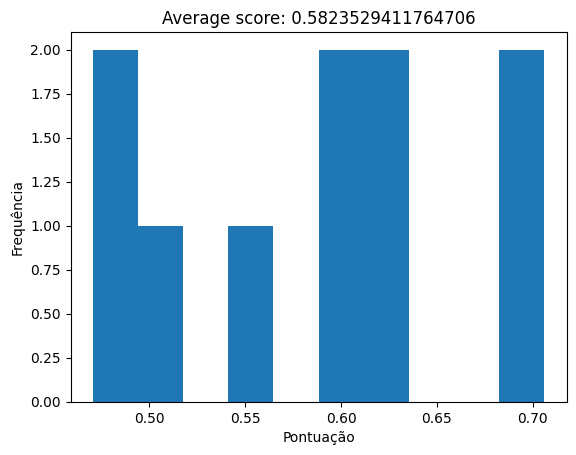

In [58]:
# Criar e treinar o modelo KNN
knn_model = KNeighborsClassifier()

# Definir a estratégia de cross-validation
crossv = StratifiedKFold(n_splits=10)


# Executar a cross-validation
cv_scores = cross_val_score(knn_model, dados, np.array(destino).ravel(), cv=crossv)

# Plotar a distribuição das pontuações da validação cruzada
plt.hist(cv_scores)
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

#### Random forest

Text(0.5, 1.0, 'Average score: 0.7632352941176471')

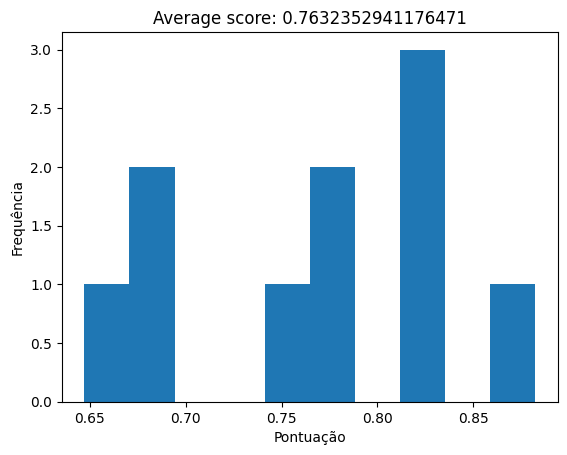

In [59]:
# Criar e treinar o modelo Random Forest
random_forest_classifier = RandomForestClassifier(random_state=42)

# Definir a estratégia de cross-validation
crossv = StratifiedKFold(n_splits=10)

# Executar a cross-validation
cv_scores = cross_val_score(random_forest_classifier, dados, np.array(destino).ravel(), cv=crossv)

# Plotar a distribuição das pontuações da cross-validation
plt.hist(cv_scores)
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

#### 5ª Tentativa
[[ voltar ao ínicio ]](#Indíce)

Retiramos as colunas: 'Ferritin', 'Total_Bil', 'Age', 'Leucocytes', 'Albumin', 'AST', 'TP', 'Creatinine', 'Major_Dim'

In [60]:
dados.drop(['Albumin', 'AST', 'TP', 'Creatinine', 'Major_Dim', 'Ferritin', 'Leucocytes', 'Age', 'Total_Bil'], axis=1, inplace=True)
dados

,PS,INR,AFP,Hemoglobin,MCV,Platelets,GGT,ALP,Iron,Sat
0,0,1.530000,95.000000,13.700000,106.600000,99.000000,183.000000,150.000000,85.598837,37.028941
1,0,1.421851,19299.951146,12.879012,95.119753,113206.442654,268.026543,212.211605,85.598837,37.028941
2,1,0.960000,5.800000,8.900000,79.800000,472.000000,202.000000,109.000000,28.000000,6.000000
3,0,0.950000,2440.000000,13.400000,97.100000,279.000000,94.000000,174.000000,85.598837,37.028941
4,0,0.940000,49.000000,14.300000,95.100000,199.000000,173.000000,109.000000,59.000000,15.000000
...,...,...,...,...,...,...,...,...,...,...
160,0,0.840000,19299.951146,15.400000,109.200000,184000.000000,449.000000,109.000000,85.598837,37.028941
161,1,1.330000,4887.000000,12.100000,88.900000,141.000000,147.000000,280.000000,85.598837,37.028941
162,0,1.130000,75.000000,13.300000,90.000000,385000.000000,164.000000,181.000000,85.598837,37.028941
163,1,2.140000,94964.000000,15.600000,117.300000,118000.000000,320.000000,170.000000,85.598837,37.028941


#### Decision Tree Classifier

Text(0.5, 1.0, 'Average score: 0.6000000000000001')

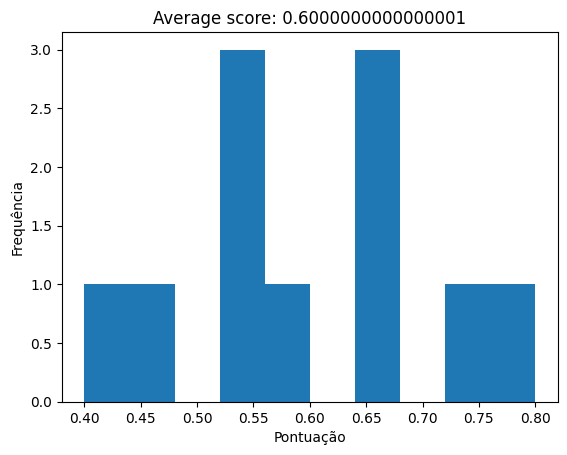

In [61]:
from sklearn.model_selection import cross_val_score

# Definir a estratégia de validação cruzada
cv_scores = cross_val_score(decision_tree_classifier, dados, destino , cv=11)

# Plotar a distribuição das pontuações da validação cruzada
plt.hist(cv_scores)
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

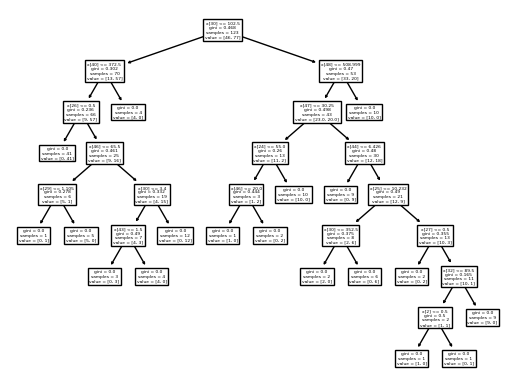

In [62]:
from sklearn.tree import plot_tree
plot_tree(decision_tree_classifier)
plt.show()

#### KNN

Text(0.5, 1.0, 'Average score: 0.5816176470588236')

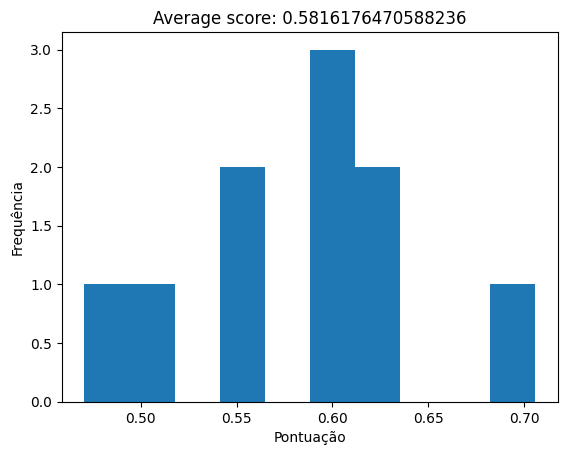

In [63]:
# Criar e treinar o modelo KNN
knn_model = KNeighborsClassifier()

# Definir a estratégia de cross-validation
crossv = StratifiedKFold(n_splits=10)


# Executar a cross-validation
cv_scores = cross_val_score(knn_model, dados, np.array(destino).ravel(), cv=crossv)

# Plotar a distribuição das pontuações da validação cruzada
plt.hist(cv_scores)
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

#### Random forest

Text(0.5, 1.0, 'Average score: 0.7213235294117647')

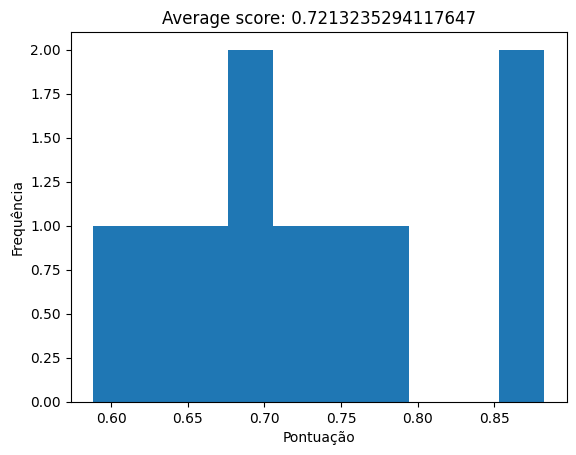

In [64]:
# Criar e treinar o modelo Random Forest
random_forest_classifier = RandomForestClassifier(random_state=42)

# Definir a estratégia de cross-validation
crossv = StratifiedKFold(n_splits=10)

# Executar a cross-validation
cv_scores = cross_val_score(random_forest_classifier, dados, np.array(destino).ravel(), cv=crossv)

# Plotar a distribuição das pontuações da cross-validation
plt.hist(cv_scores)
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

#### 6ª tentativa
[[ voltar ao ínicio ]](#Indíce)

Retiramos as colunas: 'GGT', 'INR', 'Sat', 'MCV'

In [65]:
dados.drop(['GGT', 'INR', 'Sat', 'MCV'], axis=1, inplace=True)
dados

,PS,AFP,Hemoglobin,Platelets,ALP,Iron
0,0,95.000000,13.700000,99.000000,150.000000,85.598837
1,0,19299.951146,12.879012,113206.442654,212.211605,85.598837
2,1,5.800000,8.900000,472.000000,109.000000,28.000000
3,0,2440.000000,13.400000,279.000000,174.000000,85.598837
4,0,49.000000,14.300000,199.000000,109.000000,59.000000
...,...,...,...,...,...,...
160,0,19299.951146,15.400000,184000.000000,109.000000,85.598837
161,1,4887.000000,12.100000,141.000000,280.000000,85.598837
162,0,75.000000,13.300000,385000.000000,181.000000,85.598837
163,1,94964.000000,15.600000,118000.000000,170.000000,85.598837


#### Decision Tree Classifier

Text(0.5, 1.0, 'Average score: 0.7212121212121212')

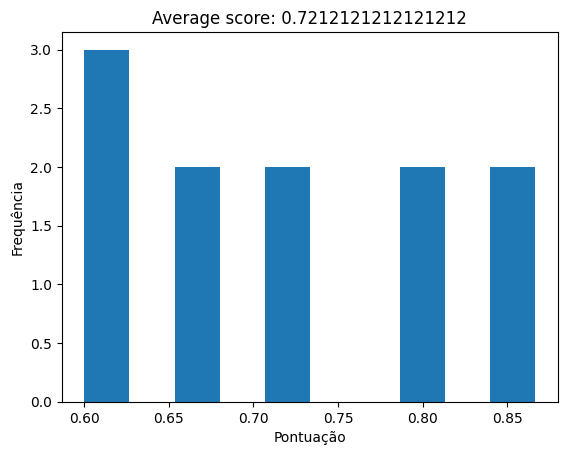

In [66]:
from sklearn.model_selection import cross_val_score

# Definir a estratégia de validação cruzada
cv_scores = cross_val_score(decision_tree_classifier, dados, destino , cv=11)

# Plotar a distribuição das pontuações da validação cruzada
plt.hist(cv_scores)
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

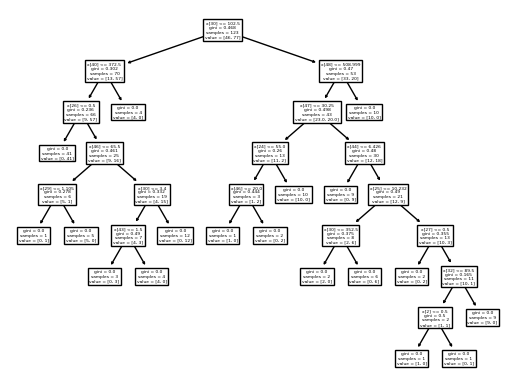

In [67]:
from sklearn.tree import plot_tree
plot_tree(decision_tree_classifier)
plt.show()

#### KNN

Text(0.5, 1.0, 'Average score: 0.58125')

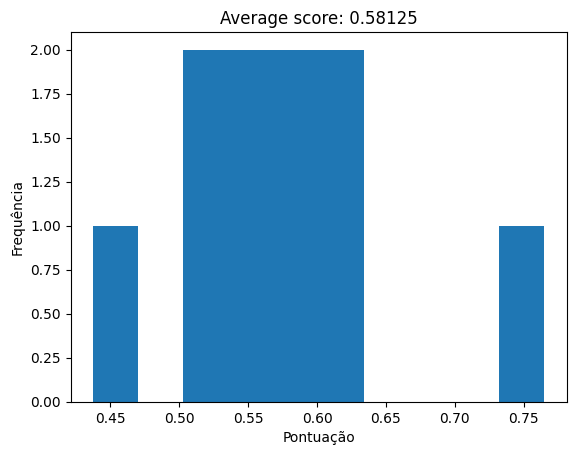

In [68]:
# Criar e treinar o modelo KNN
knn_model = KNeighborsClassifier()

# Definir a estratégia de cross-validation
crossv = StratifiedKFold(n_splits=10)


# Executar a cross-validation
cv_scores = cross_val_score(knn_model, dados, np.array(destino).ravel(), cv=crossv)

# Plotar a distribuição das pontuações da validação cruzada
plt.hist(cv_scores)
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

#### Random forest

Text(0.5, 1.0, 'Average score: 0.6963235294117647')

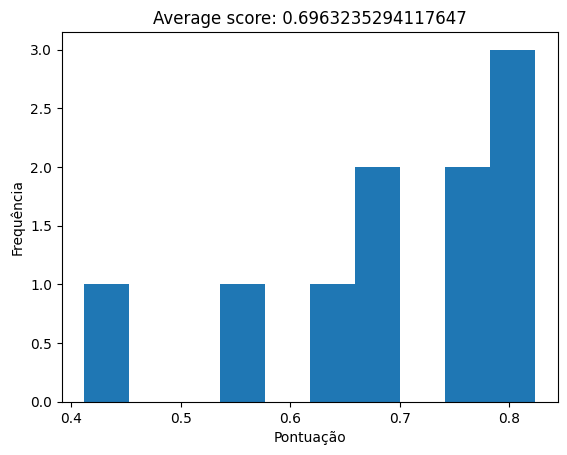

In [69]:
# Criar e treinar o modelo Random Forest
random_forest_classifier = RandomForestClassifier(random_state=42)

# Definir a estratégia de cross-validation
crossv = StratifiedKFold(n_splits=10)

# Executar a cross-validation
cv_scores = cross_val_score(random_forest_classifier, dados, np.array(destino).ravel(), cv=crossv)

# Plotar a distribuição das pontuações da cross-validation
plt.hist(cv_scores)
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Average score: {}'.format(np.mean(cv_scores)))

### Resultados

| Tentativa | Decision Tree | KNN   | Random Forest |
|-----------|---------------|-------|---------------|
| 1         | 0.636         | 0.589 | 0.728         |
| 2         | 0.600         | 0.589 | 0.722         |
| 3         | 0.582         | 0.589 | 0.740         |
| 4         | 0.582         | 0.582 | 0.763         |
| 5         | 0.600         | 0.582 | 0.721         |
| 6         | 0.721         | 0.581 | 0.696         |

Com base nos resultados obtidos, conclui-se que a remoção de features com importâncias abaixo de 0.025, Tentativa 4, produziu o melhor resultado com uma acurácia de 0.763 para o modelo Random Forest.

## Classificação final
[[ voltar ao ínicio ]](#Indíce)

In [70]:
dados = file[['ALP', 'Platelets', 'TP', 'Total_Bil', 'Iron', 'Leucocytes', 'Age', 'Ferritin', 'MCV', 'Sat', 'INR', 'GGT', 'Major_Dim', 'Creatinine', 'AST', 'Albumin', 'Hemoglobin', 'AFP', 'Platelets', 'PS']]
dados

,ALP,Platelets,TP,Total_Bil,Iron,Leucocytes,Age,Ferritin,MCV,Sat,INR,GGT,Major_Dim,Creatinine,AST,Albumin,Hemoglobin,AFP,Platelets,PS
0,150.000000,99.000000,7.100000,2.100000,85.598837,4.900000,67,438.997647,106.600000,37.028941,1.530000,183.000000,3.5,0.700000,41.000000,3.400000,13.700000,95.000000,99.000000,0
1,212.211605,113206.442654,8.961039,3.087938,85.598837,1473.961549,62,438.997647,95.119753,37.028941,1.421851,268.026543,1.8,1.127089,96.382716,3.445535,12.879012,19299.951146,113206.442654,0
2,109.000000,472.000000,7.000000,0.400000,28.000000,8.400000,78,16.000000,79.800000,6.000000,0.960000,202.000000,13.0,2.100000,68.000000,3.300000,8.900000,5.800000,472.000000,1
3,174.000000,279.000000,8.100000,0.400000,85.598837,9.000000,77,438.997647,97.100000,37.028941,0.950000,94.000000,15.7,1.110000,64.000000,3.700000,13.400000,2440.000000,279.000000,0
4,109.000000,199.000000,6.900000,0.700000,59.000000,6.400000,76,22.000000,95.100000,15.000000,0.940000,173.000000,9.0,1.800000,306.000000,4.100000,14.300000,49.000000,199.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,109.000000,184000.000000,7.600000,0.500000,85.598837,9.300000,40,438.997647,109.200000,37.028941,0.840000,449.000000,3.0,0.700000,40.000000,4.600000,15.400000,19299.951146,184000.000000,0
161,280.000000,141.000000,6.700000,3.600000,85.598837,2.500000,68,438.997647,88.900000,37.028941,1.330000,147.000000,2.2,0.700000,91.000000,3.000000,12.100000,4887.000000,141.000000,1
162,181.000000,385000.000000,7.500000,0.600000,85.598837,8.000000,65,438.997647,90.000000,37.028941,1.130000,164.000000,18.6,1.460000,52.000000,4.300000,13.300000,75.000000,385000.000000,0
163,170.000000,118000.000000,8.400000,1.100000,85.598837,5200.000000,44,438.997647,117.300000,37.028941,2.140000,320.000000,18.0,0.740000,60.000000,4.800000,15.600000,94964.000000,118000.000000,1


In [71]:
# Treinar o modelo Random Forest nos dados de treino
random_forest_classifier.fit(dados_train, destino_train)

# Avaliar o modelo Random Forest no conjunto de teste
rf_accuracy = random_forest_classifier.score(dados_test, destino_test)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')

# Prever no set de teste
predictions_rf = random_forest_classifier.predict(dados_test)

# Mostrar a matriz de confusão e o relatório de classificação
print(confusion_matrix(destino_test, predictions_rf))
print(classification_report(destino_test, predictions_rf))

Random Forest Accuracy: 0.7381
[[11  6]
 [ 5 20]]
              precision    recall  f1-score   support

        Dies       0.69      0.65      0.67        17
       Lives       0.77      0.80      0.78        25

    accuracy                           0.74        42
   macro avg       0.73      0.72      0.73        42
weighted avg       0.74      0.74      0.74        42



## Matriz de confusão e ROC
[[ voltar ao ínicio ]](#Indíce)

As matrizes de confusão e as curvas ROC são cruciais na avaliação de modelos de classificação. A matriz de confusão mostra o desempenho do modelo em prever classes reais e previstas. Enquanto isso, a curva ROC representa graficamente a capacidade discriminativa do modelo em diferentes pontos de corte. 

Ambas as ferramentas são essenciais para compreender a precisão e a capacidade preditiva dos modelos de classificação, deste modo criamos uma matriz de confusão e um ROC para cada um dos algoritmos utilizados.  

In [72]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Lives', 'Dies'], yticklabels=['Lives', 'Dies'], cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

Decision Tree

Decision Tree
[[10  7]
 [ 9 16]]
              precision    recall  f1-score   support

        Dies       0.53      0.59      0.56        17
       Lives       0.70      0.64      0.67        25

    accuracy                           0.62        42
   macro avg       0.61      0.61      0.61        42
weighted avg       0.63      0.62      0.62        42



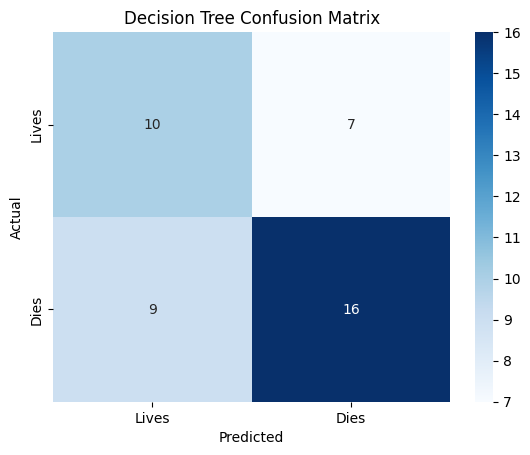

In [73]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(dados_train_balanced, destino_train_balanced)
y_pred_dt = dt_model.predict(dados_test)
print("Decision Tree")
print(confusion_matrix(destino_test, y_pred_dt))
print(classification_report(destino_test, y_pred_dt))
plot_confusion_matrix(destino_test, y_pred_dt, 'Decision Tree Confusion Matrix')

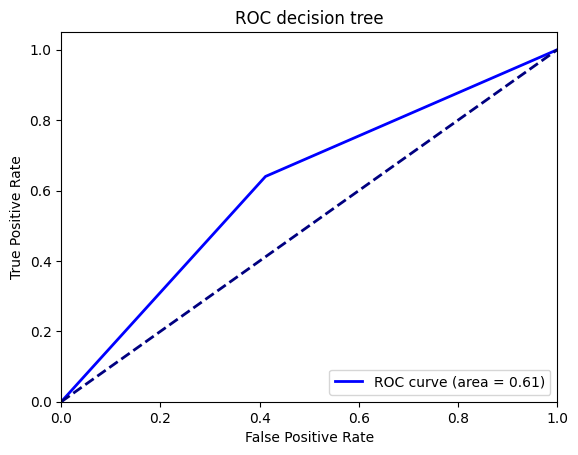

In [74]:
from sklearn.metrics import roc_curve, auc

# Supomos que 'dados_train_balanced', 'destino_train_balanced', 'dados_test', e 'destino_test' já estão definidos

# Treinar o modelo Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(dados_train_balanced, destino_train_balanced)

# Fazer previsões
y_pred_dt_proba = dt_model.predict_proba(dados_test)[:, 1]

# Calcular valores para a curva ROC, especificando a classe positiva
fpr, tpr, thresholds = roc_curve(destino_test, y_pred_dt_proba, pos_label='Lives')
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC decision tree')
plt.legend(loc="lower right")
plt.show()


KNN

K-Nearest Neighbors
[[ 9  8]
 [15 10]]
              precision    recall  f1-score   support

        Dies       0.38      0.53      0.44        17
       Lives       0.56      0.40      0.47        25

    accuracy                           0.45        42
   macro avg       0.47      0.46      0.45        42
weighted avg       0.48      0.45      0.45        42



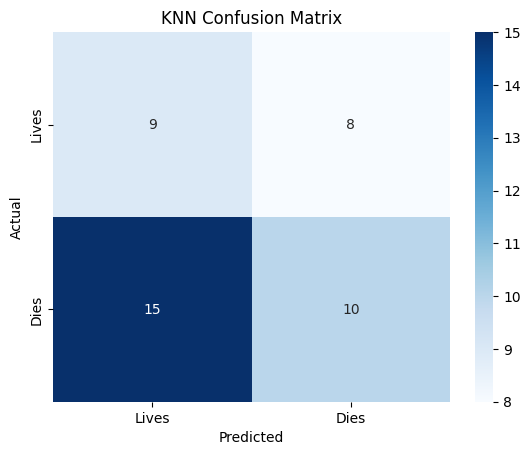

In [75]:
knn_model = KNeighborsClassifier()
knn_model.fit(dados_train_balanced, destino_train_balanced)
y_pred_knn = knn_model.predict(dados_test)
print("K-Nearest Neighbors")
print(confusion_matrix(destino_test, y_pred_knn))
print(classification_report(destino_test, y_pred_knn))
plot_confusion_matrix(destino_test, y_pred_knn, 'KNN Confusion Matrix')

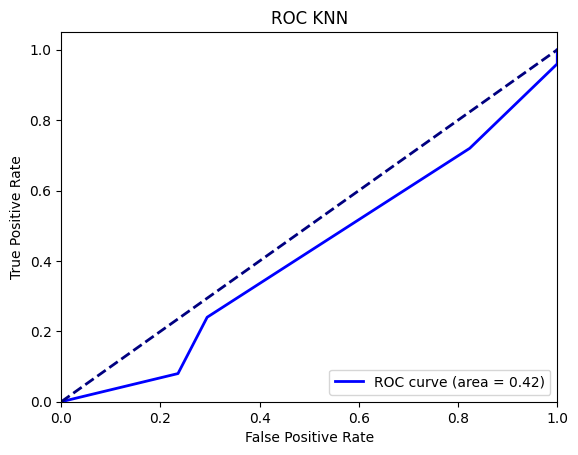

In [76]:
from sklearn.metrics import roc_curve, auc

# Supomos que 'dados_train_balanced', 'destino_train_balanced', 'dados_test', e 'destino_test' já estão definidos

# Treinar o modelo KNN
knn_model = KNeighborsClassifier()
knn_model.fit(dados_train_balanced, destino_train_balanced)

# Fazer previsões
y_pred_knn_proba = knn_model.predict_proba(dados_test)[:, 1]

# Calcular valores para a curva ROC, especificando a classe positiva
fpr, tpr, thresholds = roc_curve(destino_test, y_pred_knn_proba, pos_label='Lives')
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC KNN')
plt.legend(loc="lower right")
plt.show()

Random Forest

Random Forest
[[11  6]
 [ 7 18]]
              precision    recall  f1-score   support

        Dies       0.61      0.65      0.63        17
       Lives       0.75      0.72      0.73        25

    accuracy                           0.69        42
   macro avg       0.68      0.68      0.68        42
weighted avg       0.69      0.69      0.69        42



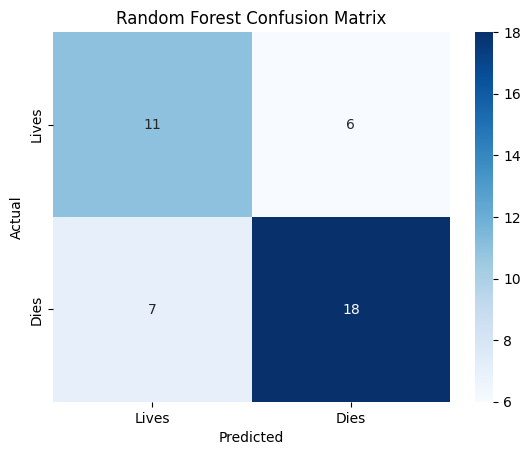

In [77]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(dados_train_balanced, destino_train_balanced)
y_pred_rf = rf_model.predict(dados_test)
print("Random Forest")
print(confusion_matrix(destino_test, y_pred_rf))
print(classification_report(destino_test, y_pred_rf))
plot_confusion_matrix(destino_test, y_pred_rf, 'Random Forest Confusion Matrix')

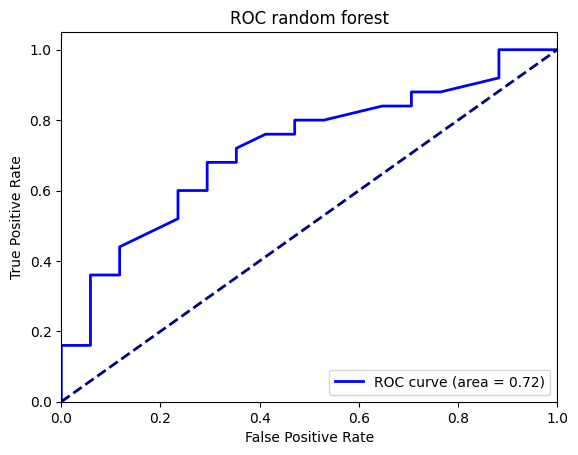

In [78]:
from sklearn.metrics import roc_curve, auc

# Supomos que 'dados_train_balanced', 'destino_train_balanced', 'dados_test', e 'destino_test' já estão definidos

# Treinar o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(dados_train_balanced, destino_train_balanced)

# Fazer previsões
y_pred_rf_proba = rf_model.predict_proba(dados_test)[:, 1]

# Calcular valores para a curva ROC, especificando a classe positiva
fpr, tpr, thresholds = roc_curve(destino_test, y_pred_rf_proba, pos_label='Lives')
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC random forest')
plt.legend(loc="lower right")
plt.show()


## Interpretação dos resultados
[[ voltar ao ínicio ]](#Indíce)

#### Decision Tree Classifier

Resultados:
- Acuracy: 58.1%  
- Precision, Recall, F1-score e support:  
  - Lives: Precision: 0.70, Recall: 0.64, F1-score: 0.67, Support: 25
  - Dies: Precision: 0.53, Recall: 0.59, F1-score: 0.56, Support: 17
- AUC: 0.61 

Interpretação:

- A Decision Tree inicial mostrou uma acuracy moderada.
- A classe 'Dies' teve uma precision mais baixa, indicando que a árvore teve mais falsos positivos nesta classe.
- A classe 'Lives' teve um desempenho melhor em termos de precision e recall.
- A AUC de 0.61 sugere que o modelo tem uma capacidade moderada de distinguir entre as classes.

#### KNN

Resultados:

- Acuracy: 58.2%
- Precision, Recall, F1-score e support:  
  - Lives: Precision: 0.56, Recall: 0.40, F1-score: 0.47, Support: 25
  - Dies: Precision: 0.38, Recall: 0.53, F1-score: 0.44, Support: 17
- AUC: 0.42

Interpretação:

- O KNN inicial teve um desempenho inferior, especialmente na classe 'Dies', comparativamente aos outros modelos.
- Este modelo apresentou dificuldades a prever corretamente a classe 'Lives', resultando numa baixa precision e recall.
- A AUC de 0.42 indica que o modelo não é muito eficaz em distinguir entre as classes.

#### Random Forest Classifier

Resultados:

- Acuracy: 76.3%
- Precision, Recall e F1-score, F1-score e support:  
  - Lives: Precision: 0.75, Recall: 0.72, F1-score: 0.73, Support: 25
  - Dies: Precision: 0.61, Recall: 0.65, F1-score: 0.63, Support: 17
- AUC: 0.72

Interpretação:

- O modelo Random Forest foi o que apresentou melhor desempenho entre os modelos testados, tanto com todos os dados como com os dados simplificados.
- Este modelo é bom em identificar corretamente os casos em que a classe 'Lives'.
- Apesar de apresentar o melhor resultado quando comparado aos outros algoritmos, a classe 'Dies' apresenta uma precisão inferior a classe 'Lives'. 
- A AUC de 0.72 indica que o modelo é o mais eficaz em distinguir entre as classes.

## Conclusão
[[ voltar ao ínicio ]](#Indíce)

Ao longo deste trabalho, aplicamos diferentes algoritmos de Machine Learning (Decision Tree, KNN e RandomForest) de modo a obtermos diferentes abordagens e compreendermos qual a que melhor se aplicava ao nosso dataset.
Concluímos, a partir dos resultados obtidos, que os melhores resultados são apresentados pelo modelo RandomForest.

No pré-processamento de dados, a maior dificuldade foi compreender se haveria alguma coluna que poderíamos excluir automaticamente e encontrar outliers. Estas dificuldades fizeram-se sentir, principalmente, devido ao grande número de colunas (50). Além disto, a falta de dados, em praticamente todas as linhas, não nos permitiu simplesmente ignorá-las tendo de os tratar de duas formas diferentes, uma para os dados categóricos (moda) e outra para os dados numéricos (média).

A primeira decision tree desenhada, já com algum tratamento de dados, obteve resultado moderados, no entanto através da análise exploratória dos dados chegámos à conclusão que os resultados não poderiam ser muito superiores a 70%, devido à natureza intrínseca do problema ou até mesmo às limitações dos dados disponíveis.

Após algum tratamento de dados, aplicámos os modelos com diversas formatações dos referidos dados e encontramos o melhor resultado no algoritmo RandomForest.

Este trabalho permitiu-nos desenvolver e aprimorar os nossos conhecimentos em Data Science, sendo uma primeira exposição desafiante à manipulação de datasets e permitiu-nos aprofundar as nossas habilidades na utilização de bibliotecas python usadas em Data Science e em Machine Learning, assim como conhecer o workflow e pipeline de um projeto de Data science.